# 송파구 송파구청 따릉이 스테이션 예측 분석
### 서울시 각 대여소별로 시간대별 자전거 배치를 최적화하는 데이터 기반 웹 서비스 개발.
> [서울 열린데이터 광장](https://data.seoul.go.kr/) 이용
- [서울시 공공자전거 대여소 정보](https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do)
- [서울시 공공자전거 이용정보(일별)](https://data.seoul.go.kr/dataList/OA-15246/F/1/datasetView.do)
- [기상청 종관기상관층(ASOS)- 자료](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)
- [서울특별시 대기환경정보 (일별 평균)](https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123)
- [행정동 단위 서울 생활인구(내국인)](https://data.seoul.go.kr/dataList/OA-14991/S/1/datasetView.do#)
- [서울시 지하철호선별 역별 승하차 인원 정보](https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do)

## 송파구청 따릉이 거치대수 추출
[서울시 공공자전거 대여소 정보](https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do)

> 초기 설정

In [1]:
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

> 데이터 불러오기

In [2]:
import pandas as pd 
public_bike_stations = pd.read_csv('../../data/공공자전거 대여소 정보.csv')
public_bike_stations

대여소\n번호    보관소(대여소)명   자치구                             상세주소         위도  \
0         301  경복궁역 7번출구 앞   종로구  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞  37.575794   
1         302  경복궁역 4번출구 뒤   종로구  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤  37.575947   
2         303  광화문역 1번출구 앞   종로구       서울특별시 종로구 세종대로 지하189 세종로공원  37.571770   
3         305       종로구청 옆   종로구               서울특별시 종로구 세종로 84-1  37.572559   
4         307    서울역사박물관 앞   종로구      서울특별시 종로구 새문안로 55 서울역사박물관 앞  37.570000   
...       ...          ...   ...                              ...        ...   
2758     5872      서경팰리스 앞  영등포구                    영등포구 가마산로 468  37.505764   
2759     6057  을지로5가(방산시장)    중구                       중구 동호로 369  37.567398   
2760     6058  서울도시건축전시관 옆    중구                      중구 세종대로 101  37.566540   
2761     6059        덕수중학교    중구                   중구 인현동2가 240-2  37.564392   
2762     6173  서울자동차운전전문학원   강서구                    강서구 남부순환로 216  37.546135   

              경도      설치\n시기  거치대수(LCD)  거치대수(QR) 운영\n방식  
0     126.971451  2015-10-07       20.0      20.0     QR  
1     126.974060  2015-10-07       12.0      12.0     QR  
2     126.974663  2015-10-07        8.0       8.0     QR  
3     126.978333  2015-01-07       16.0      16.0     QR  
4     126.971100  2015-10-07       11.0      11.0     QR  
...          ...         ...        ...       ...    ...  
2758  126.908661  2024-03-18        NaN       7.0     QR  
2759  127.002014  2024-04-11        NaN       6.0     QR  
2760  126.976845  2024-04-26        NaN      10.0     QR  
2761  126.997299  2024-06-03        NaN       8.0     QR  
2762  126.821060  2024-03-18        NaN      10.0     QR  

[2763 rows x 10 columns]

> 송파구청 대여소 추출

In [3]:
stations = public_bike_stations['보관소(대여소)명']
for station in stations:
    print(station)

경복궁역 7번출구 앞
경복궁역 4번출구 뒤
광화문역 1번출구 앞
 종로구청 옆
 서울역사박물관 앞
 광화문 S타워 앞
광화문역 6번출구 옆 B
 국립현대미술관
종각역 1번출구 앞
안국역 5번출구 앞
 낙원상가 옆
 탑골공원 앞
청계2가 사거리 옆
종로3가역 2번출구 뒤
종로3가역 15번출구 앞
 창경궁 입구
세운스퀘어 앞
종로4가 사거리
 혜화동 로터리
혜화역 3번출구 뒤
 대학로 마로니에공원
힐스테이트창경궁 아파트 앞
 성균관대 E하우스 앞
 서울보증보험본사 앞
 독립문역 사거리
어린이도서관
 청운초교 앞 삼거리
 중앙고입구 삼거리
 재동초교 앞 삼거리
 포르투갈 대사관 앞
서울사대부설초등학교 앞
 KT혜화지사 앞
성균관대입구 사거리 A
 원남동사거리
동묘앞역 1번출구 뒤
청계8가 사거리 A
신설동역 11번출구 뒤
창신역 1번출구 앞
독립문역 3-1번출구
 SK 서린빌딩 앞
종각역 5번출구
 동성중학교 앞
동대문역 8번 출구
경희궁 자이 3단지
경희궁 자이 2단지
 종묘공영주차장 건너편
 상명대입구
 신영동삼거리
 일성아파트
 효자동 삼거리
 청와대앞길
 동대문 종합시장 버스정류장
종로오가 지하쇼핑센터 14번출구
종로2가 버스정류장 (종각방향)
종로6가역 버스정류장(동대문 방향)
숭인2동 주민센터 입구
 종로꽃시장 입구 옆
광화문역 5번출구
 서울지방경찰청
 신영동삼거리(북악터널방향)
 삼청동 골목
 삼청공원 앞
 평창동주민센터 앞
창신두산아파트
이화공영주차장
서울특별시 중부교육지원청
파크팰리스
안국동사거리(신)
종로타워빌딩
종로3가역 8번출구
종묘
세운상가
종로플레이스
종로5가역 4번출구
동대문역6번출구
동묘앞역 6번출구
창신3동주민센터
창신역2번 출구
국립어린이과학관
 성균관대입구 사거리 B
혜화역 1번출구
성균관대 정문
현대그룹(본사)
광화문 풍림스페이스본 1단지앞
독립문역 2번출구 뒤
인왕산 아이파크 정문
서울미술관
HW컨벤션센터 앞
구기치안센터 앞
로제우스 레포츠센터
종로2가 사거리
쌍용아파트2단지 정문
청계3가 사거리
 조계사앞사거리
 자교교회 앞

> 역 이름이 '송파구청'인것을 확인.

In [4]:
songpa = public_bike_stations[public_bike_stations['보관소(대여소)명'] == ' 송파구청']
songpa

대여소\n번호 보관소(대여소)명  자치구          상세주소         위도         경도      설치\n시기  \
2488     2608      송파구청  송파구  송파구 올림픽로 326  37.515053  127.10627  2018-11-12   

      거치대수(LCD)  거치대수(QR) 운영\n방식  
2488       15.0      10.0     QR

> 거치대수는 LCD이므로 거치대수 컬럼을 합쳐주고 정리.

In [5]:
# 거치대수 컬럼 생성
songpa['거치대수(LCD)'] = songpa['거치대수(LCD)'].fillna(0)
songpa['거치대수(QR)'] = songpa['거치대수(QR)'].fillna(0)
songpa['거치대수'] = songpa[['거치대수(LCD)', '거치대수(QR)']].sum(axis=1)

# 거치대수(LCD), 거치대수(QR) 컬럼 삭제
songpa.drop(columns=['거치대수(LCD)','거치대수(QR)','운영\n방식','설치\n시기'], inplace= True)

# 컬럼 이름 정리
songpa.rename(columns={'대여소\n번호':'대여소 번호', '보관소(대여소)명':'대여소'}, inplace=True)

# 거치대수는 소수점 아래 숫자가 나올 일이 없기에 Int type으로 변환
songpa['거치대수'] = songpa['거치대수'].astype('int')

# 데이터 확인
songpa

대여소 번호    대여소  자치구          상세주소         위도         경도  거치대수
2488    2608   송파구청  송파구  송파구 올림픽로 326  37.515053  127.10627    25

## 송파구청 시각화

In [6]:
import folium
import folium.map

# 송파구 중심 위치 설정
center_lat = songpa['위도']
center_lon = songpa['경도']

# 지도 생성
sp_map = folium.Map(location=[center_lat, center_lon], zoom_start=17)

# 데이터프레임의 각 대여소 정보를 지도에 추가
folium.Marker(
    location=[songpa['위도'], songpa['경도']],  # 위도와 경도를 지정
    popup=f"{songpa['대여소']}거치대수: {songpa['거치대수']}",  # 팝업으로 대여소 이름과 거치대수 표시
    tooltip=songpa['대여소'],  # 마우스 오버 시 표시할 텍스트
).add_to(sp_map)

sp_map

> 송파구청 주변에는 석천호수가 있고 잠실역이 위치해있어 지하철 및 유동인구 데이터가 중요해보임.

In [7]:
# 데이터 저장

songpa.to_csv("../../data/송파구청 거치대수.csv")

> 추출한 송파구청 거치대수 데이터 저장

---

## 송파구청 일별 대여, 반납 공공데이터
- [서울시 공공자전거 이용정보(시간대별)](https://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do)

In [8]:
import pandas as pd

# 데이터 불러오기
songpa_time_data = pd.read_csv("../../data/송파구 대여_반납 정보.csv")

# 데이터 확인
songpa_time_data.head()

자전거번호                 대여일시  대여 대여소번호         대여 대여소명  대여거치대  \
0  SPB-62435  2024-04-01 00:02:22      2637  아시아지하보도 14번 출구      0   
1  SPB-58734  2024-04-01 00:03:25      1295        잠실역 8번출구      0   
2  SPB-43679  2024-04-01 00:01:12      4880         송파청소년센터      0   
3  SPB-31592  2024-04-01 00:05:20      2621     한성백제역 2번 출구      0   
4  SPB-69307  2024-04-01 00:00:53      4465      건영아파트앞 사거리      0   

                  반납일시  반납대여소번호             반납대여소명 반납거치대  이용시간(분)  이용거리(M)  \
0  2024-04-01 00:02:35   2637.0     아시아지하보도 14번 출구     0        0     0.00   
1  2024-04-01 00:05:04   4486.0           홈플러스 잠실점     0        1     0.00   
2  2024-04-01 00:05:08   4893.0           문정법조단지12     0        3   471.33   
3  2024-04-01 00:05:30   2621.0        한성백제역 2번 출구     0        0     0.10   
4  2024-04-01 00:09:05   4490.0  송파파인타운 10단지 1005동     0        8  1062.41   

     생년   성별 이용자종류  대여대여소ID  반납대여소ID  자전거구분  자치구 반납 자치구  
0  1974   \N   내국인  ST-1864  ST-1864  일반자전거  송파구    송파구  
1  2004    M   내국인  ST-1584  ST-2596  일반자전거  송파구    송파구  
2  1997    M   내국인  ST-2957  ST-2972  일반자전거  송파구    송파구  
3  2003    M   내국인  ST-1719  ST-1719  일반자전거  송파구    송파구  
4  2000  NaN   내국인  ST-2581  ST-2598  일반자전거  송파구    송파구

In [9]:
# 데이터 정보 확인
songpa_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   float64
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
 17  자치구       object 
 18  반납 자치구    object 
dtypes: float64(2), int64(3), object(14)
memory usage: 753.8+ MB


In [10]:
# 대여일시, 반납일시 datetime type으로 변경
songpa_time_data['대여일시'] = pd.to_datetime(songpa_time_data['대여일시'])
songpa_time_data['반납일시'] = pd.to_datetime(songpa_time_data['반납일시'])

### 송파구청 데이터 분리
#### 분리하는 이유?              
1. 송파구청 이용 패턴 분석      
    - 대여와 반납 데이터가 혼합되어 있을 경우 특정 대여소의 정확한 이용 패턴을 분석하기 어려움.     
    - 송파구청을 중심으로 데이터를 분리하여 시간대별 대여와 반납 양상 명확히 분석     
2. 대여소별 수요 예측           
    - 대여소에서 발생하는 대여 및 반납 수요를 개별적으로 분석해야 시간대별 자전거 수급을 최적화 할 수 있음.     
    - 이를 통해 특정 시간대에 자전거 부족 또는 초과 여부를 예측할 수 있습니다.      
3. 지역 맞춤형 서비스 제공                      
    - 송파구청 특정한 특성을 지닌 대여소일 가능성이 있음.(석촌호수, 유동 인구 많음)          
    - 데이터를 분리하여 대여소에 맞는 서비스 개선 방안 제시.        
4. 모델 정확도 향상         
    - 머신러닝에서 사용되는 입력 데이터는 분리될 수록 정확도가 높아짐.      
5. 데이터 시각화 및 이해도 향상         
    - 송파구청에 집중된 데이터를 그래프로 시각화하면, 스테이션의 이용흐름을 직관적으로 파악할 수 있음.      

**이를 통해 분석 결과를 더 효과적으로 전달가능**

### 이동 경로 분석에 대하여 
- 이동경로(출발지-도착지)는 이동 패턴 분석이 필요할 때 중요함.
- 대부분의 대여 시스템에서는 이동 경로보다는 개별 대여소의 수요 예측과 균형 유지가 더 중요한 문제           

**서울시를 대상으로 웹을 개발할 목적이라 스테이션에 자전거 대여수가 중요함.**

> 송파구청 데이터 추출

In [11]:
# 대여소명이 송파구청인 데이터

rent_data = songpa_time_data[songpa_time_data['대여 대여소명'] == '송파구청']

In [12]:
# 반납 대여소명이 송파구청인 데이터 
return_data = songpa_time_data[songpa_time_data['반납대여소명'] == '송파구청']

In [13]:
rent_data

자전거번호                대여일시  대여 대여소번호 대여 대여소명  대여거치대  \
68       SPB-57930 2024-04-01 00:19:51      2608    송파구청      0   
92       SPB-65764 2024-04-01 00:31:17      2608    송파구청      0   
93       SPB-68175 2024-04-01 00:30:43      2608    송파구청      0   
96       SPB-60740 2024-04-01 00:36:46      2608    송파구청      0   
227      SPB-30463 2024-04-01 01:28:19      2608    송파구청      0   
...            ...                 ...       ...     ...    ...   
5199342  SPB-51565 2023-09-30 23:09:06      2608    송파구청      0   
5199387  SPB-57133 2023-09-30 23:23:18      2608    송파구청      0   
5199516  SPB-48970 2023-09-30 23:10:48      2608    송파구청      0   
5199534  SPB-46627 2023-09-30 23:42:04      2608    송파구청      0   
5199549  SPB-58739 2023-09-30 23:46:59      2608    송파구청      0   

                       반납일시  반납대여소번호       반납대여소명 반납거치대  이용시간(분)  이용거리(M)  \
68      2024-04-01 00:32:34   1221.0     삼전역 4번출구     0       12  2270.94   
92      2024-04-01 00:40:29   1248.0       방이초등학교     0        9  1380.00   
93      2024-04-01 00:40:30   1248.0       방이초등학교     0        9  1450.00   
96      2024-04-01 00:41:00   1295.0     잠실역 8번출구     0        4   560.00   
227     2024-04-01 01:35:15   4859.0     잠실나루 나들목     0        6   996.18   
...                     ...      ...          ...   ...      ...      ...   
5199342 2023-09-30 23:29:33   1208.0    풍납현대아파트쉼터     0       20   810.00   
5199387 2023-09-30 23:33:47   4857.0   올림픽공원 장미광장     0       10  1947.32   
5199516 2023-09-30 23:47:17   1020.0        강동경찰서     0       36  5320.00   
5199534 2023-09-30 23:49:09   1226.0  잠실4동 주민센터 옆     0        7  1030.00   
5199549 2023-09-30 23:51:17   1231.0     잠실역 6번출구     0        4   850.00   

           생년   성별 이용자종류  대여대여소ID  반납대여소ID  자전거구분  자치구 반납 자치구  
68       1997    M   내국인  ST-1681   ST-933  일반자전거  송파구    송파구  
92         \N    F   내국인  ST-1681   ST-908  일반자전거  송파구    송파구  
93       1966    M   내국인  ST-1681   ST-908  일반자전거  송파구    송파구  
96       1978   \N   내국인  ST-1681  ST-1584  일반자전거  송파구    송파구  
227      2004    M   내국인  ST-1681  ST-2609  일반자전거  송파구    송파구  
...       ...  ...   ...      ...      ...    ...  ...    ...  
5199342  2004    M   내국인  ST-1681   ST-541  일반자전거  송파구    송파구  
5199387  2000  NaN   내국인  ST-1681  ST-2621  일반자전거  송파구    송파구  
5199516  1988   \N   내국인  ST-1681   ST-503  일반자전거  송파구    강동구  
5199534  2001    M   내국인  ST-1681   ST-894  일반자전거  송파구    송파구  
5199549  1985    M   내국인  ST-1681   ST-840  일반자전거  송파구    송파구  

[90318 rows x 19 columns]

> 대여대수 및 반납대수 계산

In [14]:
# 대여소명 기준으로 대여대수 집계
rent_count = rent_data.groupby(['대여 대여소명', rent_data['대여일시'].dt.date.rename('날짜'), rent_data['대여일시'].dt.hour.rename('시간대')]).size().reset_index(name='대여대수')

# 반납소명 기준으로 반납대수 집계
return_count = return_data.groupby(['반납대여소명', return_data['반납일시'].dt.date.rename('날짜'), return_data['반납일시'].dt.hour.rename('시간대')]).size().reset_index(name='반납대수')

##### 시간대별 데이터 병합

In [15]:
# 대여대수와 반납대수를 날짜와 시간대를 기준으로 병합
merged_data = pd.merge(
    rent_count.rename(columns={'대여 대여소명': '대여소'}),
    return_count.rename(columns={'반납대여소명': '대여소'}),
    on=['대여소', '날짜', '시간대'],
    how='outer'
).fillna(0)  # NaN 값은 0으로 대체

# 병합된 데이터 확인
print(merged_data.head())

    대여소          날짜  시간대  대여대수  반납대수
0  송파구청  2023-05-01    0   3.0   1.0
1  송파구청  2023-05-01    1  10.0   1.0
2  송파구청  2023-05-01    2   3.0   0.0
3  송파구청  2023-05-01    3   2.0   0.0
4  송파구청  2023-05-01    4   2.0   0.0


In [16]:
# 정보 확인
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348 entries, 0 to 8347
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소     8348 non-null   object 
 1   날짜      8348 non-null   object 
 2   시간대     8348 non-null   int32  
 3   대여대수    8348 non-null   float64
 4   반납대수    8348 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 293.6+ KB


#### 휴일여부(평일,휴일), 연, 월, 일 추가

In [17]:
# 날짜 column을 datetime으로 변환
merged_data['날짜'] = pd.to_datetime(merged_data['날짜'])

# 연, 월, 일. 휴일여부 컬럼 추가
merged_data['연'] = merged_data['날짜'].dt.year
merged_data['월'] = merged_data['날짜'].dt.month
merged_data['일'] = merged_data['날짜'].dt.day
merged_data['휴일여부'] = merged_data['날짜'].dt.weekday.apply(lambda x: '휴일' if x >= 5 else '평일')

merged_data

대여소         날짜  시간대  대여대수  반납대수     연  월   일 휴일여부
0     송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일
1     송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일
2     송파구청 2023-05-01    2   3.0   0.0  2023  5   1   평일
3     송파구청 2023-05-01    3   2.0   0.0  2023  5   1   평일
4     송파구청 2023-05-01    4   2.0   0.0  2023  5   1   평일
...    ...        ...  ...   ...   ...   ... ..  ..  ...
8343  송파구청 2024-05-31   21  13.0  15.0  2024  5  31   평일
8344  송파구청 2024-05-31   22   8.0   7.0  2024  5  31   평일
8345  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일
8346  송파구청 2024-06-01    0   0.0   1.0  2024  6   1   휴일
8347  송파구청 2024-06-01    5   0.0   1.0  2024  6   1   휴일

[8348 rows x 9 columns]

#### 계절 컬럼 추가

In [18]:
# 계절 함수 
def get_seasons(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    elif month in [12, 1, 2]:
        return '겨울'

# 계절 컬럼 추가
merged_data['계절'] = merged_data['월'].apply(get_seasons)

# 데이터 확인
merged_data

대여소         날짜  시간대  대여대수  반납대수     연  월   일 휴일여부  계절
0     송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄
1     송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄
2     송파구청 2023-05-01    2   3.0   0.0  2023  5   1   평일   봄
3     송파구청 2023-05-01    3   2.0   0.0  2023  5   1   평일   봄
4     송파구청 2023-05-01    4   2.0   0.0  2023  5   1   평일   봄
...    ...        ...  ...   ...   ...   ... ..  ..  ...  ..
8343  송파구청 2024-05-31   21  13.0  15.0  2024  5  31   평일   봄
8344  송파구청 2024-05-31   22   8.0   7.0  2024  5  31   평일   봄
8345  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄
8346  송파구청 2024-06-01    0   0.0   1.0  2024  6   1   휴일  여름
8347  송파구청 2024-06-01    5   0.0   1.0  2024  6   1   휴일  여름

[8348 rows x 10 columns]

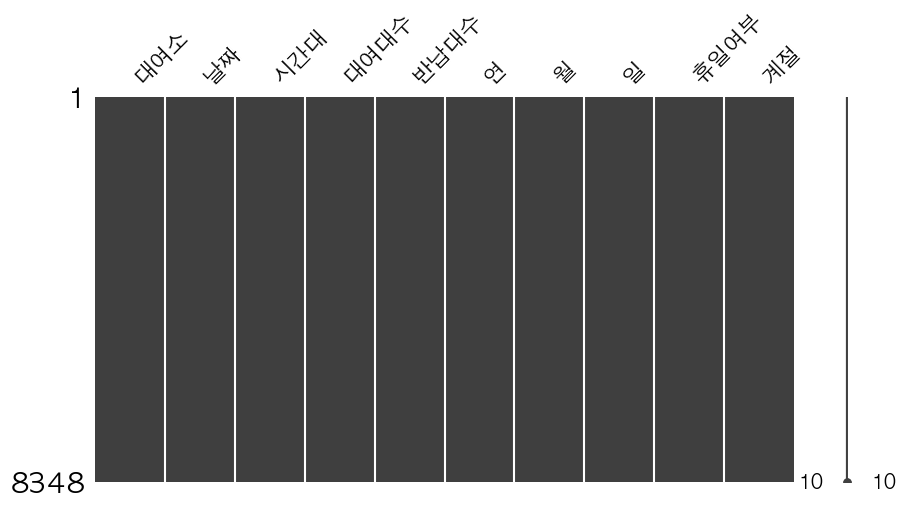

In [19]:
import missingno as msno

# 결측치 시각화
msno.matrix(merged_data, figsize=(10,5))
plt.show()

---

## EDA 중간 확인

### describe 및 분포 확인

In [20]:
# describe 
print(merged_data[['대여대수','반납대수']].describe())

              대여대수         반납대수
count  8348.000000  8348.000000
mean     10.819118    11.127935
std      11.691611    11.634635
min       0.000000     0.000000
25%       2.000000     2.000000
50%       7.000000     8.000000
75%      16.000000    16.000000
max      93.000000    88.000000


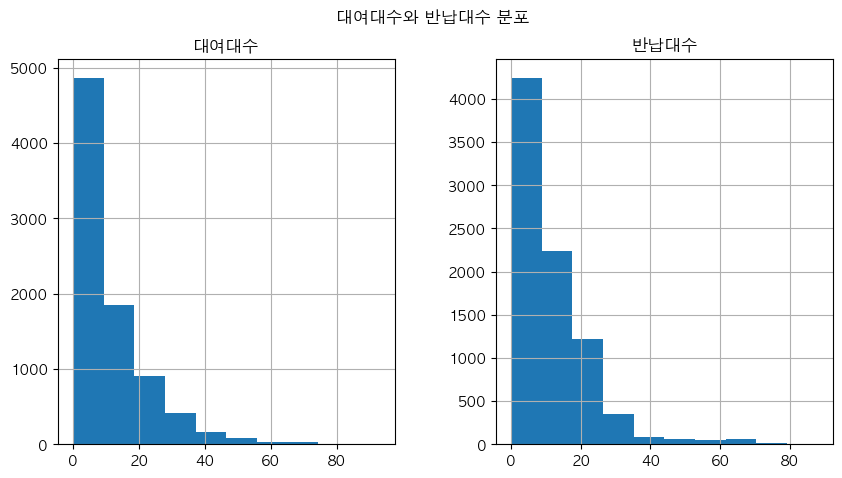

In [21]:
# hist 분포 확인
merged_data[['대여대수', '반납대수']].hist(figsize=(10,5))
plt.suptitle('대여대수와 반납대수 분포')
plt.show()

> 대여대수와 반납대수의 분포가 균형을 이루고 있는 것을 확인 할 수 있다.

### 상관계수 계산

In [22]:
# 상관계수 계산
correlation = merged_data['대여대수'].corr(merged_data['반납대수'])
print(f"대여대수와 반납대수의 상관계수: {correlation:.2f}")

대여대수와 반납대수의 상관계수: 0.61


### 대여 및 반납 패턴 분석

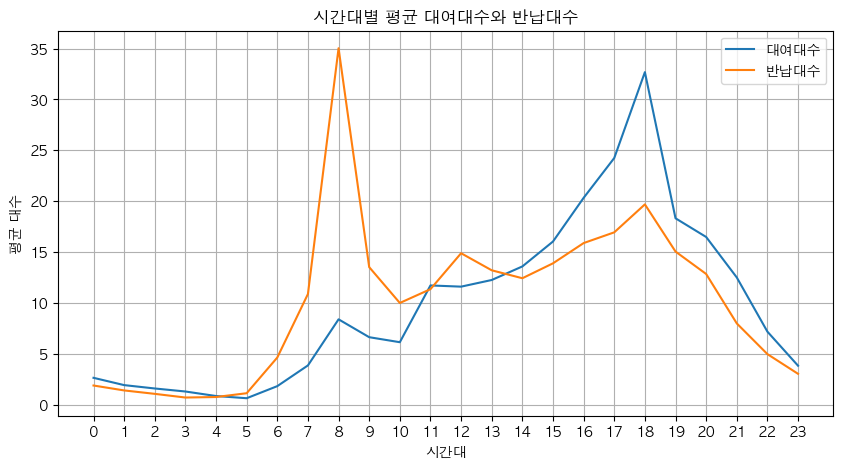

In [23]:
# 시간대별 평균 대여 대수와 반납 대수
time_group = merged_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10,5))
plt.title('시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대')
plt.ylabel('평균 대수')
plt.xticks(range(24))
plt.grid()
plt.show()

> 송파구청 따릉이 대여소는 출/퇴근 시간인 8시와 18시에 평균 반납/대여 대수가 많이 확인되고 출근 시간 때는 대여대수 보다 반납대수의 평균 대수가 높고, 퇴근 시간에는 대여 대수가 더 높은 것을 알 수 있다.

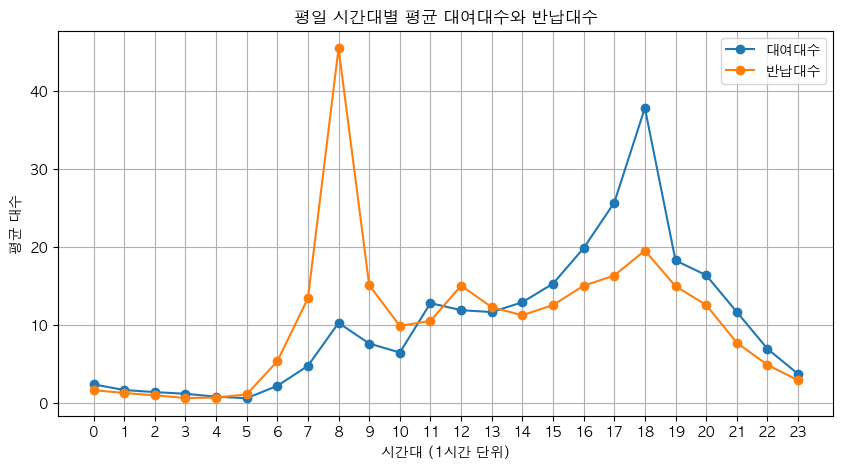

In [24]:
# '휴일여부'가 평일인 데이터만 필터링
holiday_data = merged_data[merged_data['휴일여부'] == '평일']

# 시간대별 평균 대여대수와 반납대수 계산
time_group = holiday_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('평일 시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대 (1시간 단위)')
plt.ylabel('평균 대수')
plt.xticks(range(24))  # 0~23시로 설정
plt.grid()
plt.show()

> 평일은 역시 출 퇴근 시간대인 오전 8시와 오후 6시가 많은 것을 확인할 수가 있다.

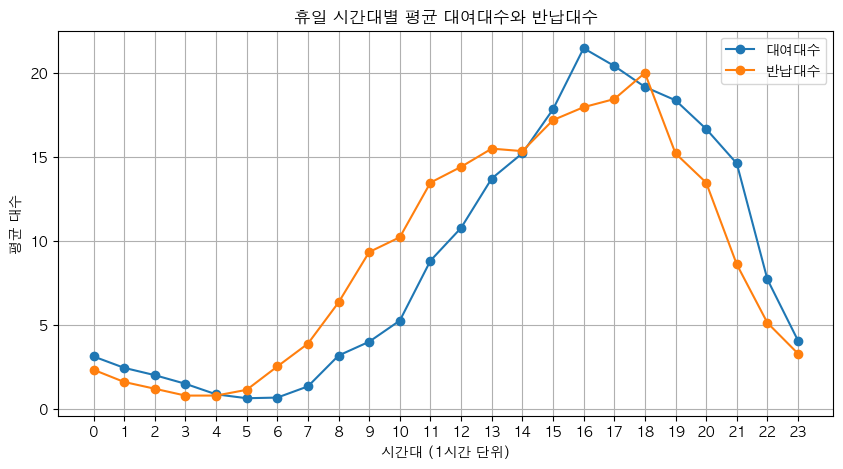

In [25]:
# '휴일여부'가 휴일인 데이터만 필터링
holiday_data = merged_data[merged_data['휴일여부'] == '휴일']

# 시간대별 평균 대여대수와 반납대수 계산
time_group = holiday_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('휴일 시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대 (1시간 단위)')
plt.ylabel('평균 대수')
plt.xticks(range(24))  # 0~23시로 설정
plt.grid()
plt.show()

> 휴일 시간대별은 평일과 다르게 오후 4시에서 6시가 가장 많은 이용객이 이용하는 것을 알 수 있다.

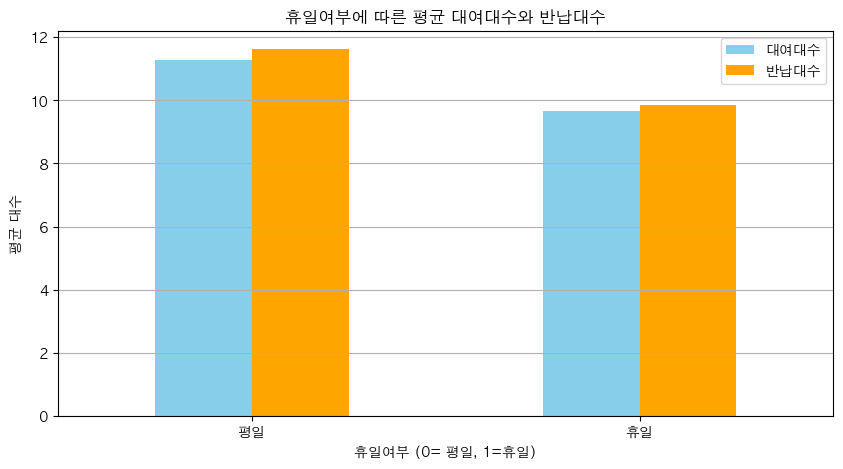

In [26]:
# 휴일여부별 평균 대여대수와 반납대수
holiday_group = merged_data.groupby('휴일여부')[['대여대수','반납대수']].mean()

# 시각화
holiday_group.plot(kind='bar', figsize=(10,5), color=['skyblue', 'orange'])
plt.title('휴일여부에 따른 평균 대여대수와 반납대수')
plt.xlabel('휴일여부 (0= 평일, 1=휴일)')
plt.ylabel('평균 대수')
plt.xticks(rotation = 0)
plt.grid(axis='y')
plt.show()

> 위의 그래프에서 알 수 있듯이 평일 출퇴근 이용자가 따릉이를 많이 이용하는 것을 알 수 있다.

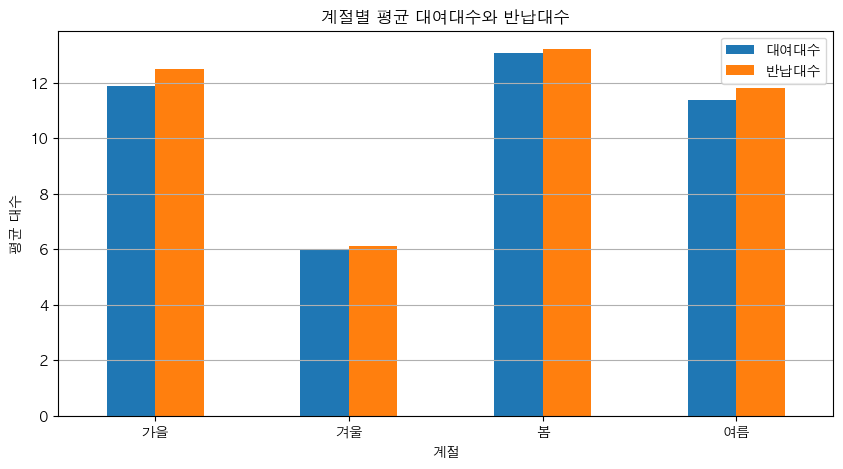

In [27]:
# 계절별 평균 대여대수와 반납대수
season_group = merged_data.groupby('계절')[['대여대수','반납대수']].mean()

# 시각화
season_group.plot(kind='bar', figsize=(10,5))
plt.title('계절별 평균 대여대수와 반납대수')
plt.xlabel('계절')
plt.ylabel('평균 대수')
plt.xticks(rotation = 0)
plt.grid(axis='y')
plt.show()

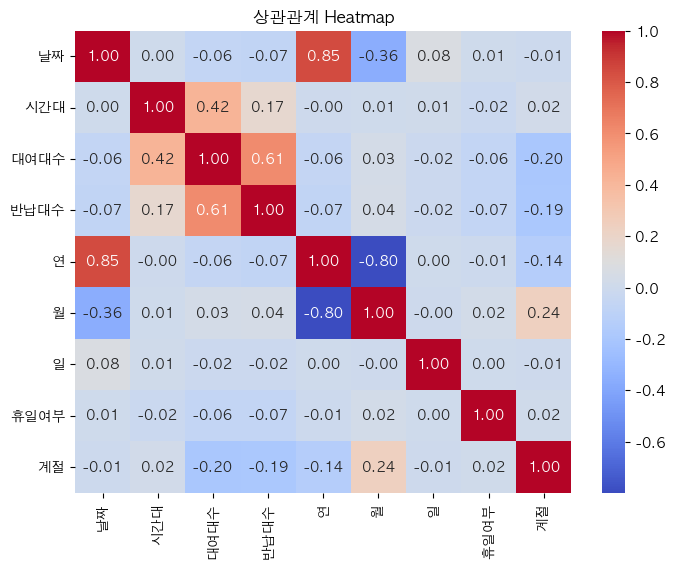

In [28]:
import seaborn as sns

# 상관관계 Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(merged_data.replace({'평일':0, '휴일':1, '봄': 0, '여름': 1, '가을': 2, '겨울': 3}).drop(columns='대여소').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계 Heatmap')
plt.show()

> 시간대는 대여수와 약한 상관관계를 보이지만 다른 컬럼은 상관성이 거의 없다는 것을 알 수 있다.

---
## 날씨 데이터 추가
[기상청 종관기상관층(ASOS)- 자료](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)
- main feature를 찾지 못했으므로 날씨에 따른 따릉이 평균 대여대수와 반납대수를 파악해보겠다.

In [29]:
# 데이터 불러오기
weather_data = pd.read_csv("../../data/2305~2405 날씨.csv", encoding='cp949')
weather_data

지점 지점명                일시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  전운량(10분위)  \
0     108  서울  2023-05-01 00:00    12.1      0.0      2.8     87          9   
1     108  서울  2023-05-01 01:00    11.6      NaN      2.9     88          6   
2     108  서울  2023-05-01 02:00    11.0      NaN      2.3     90          6   
3     108  서울  2023-05-01 03:00    10.8      NaN      1.9     91          8   
4     108  서울  2023-05-01 04:00    10.4      NaN      2.2     92          8   
...   ...  ..               ...     ...      ...      ...    ...        ...   
9523  108  서울  2024-05-31 19:00    18.7      1.0      2.7     65          8   
9524  108  서울  2024-05-31 20:00    18.4      NaN      1.2     68          8   
9525  108  서울  2024-05-31 21:00    18.7      NaN      2.5     67          9   
9526  108  서울  2024-05-31 22:00    18.8      NaN      2.3     73         10   
9527  108  서울  2024-05-31 23:00    18.4      0.0      2.8     80         10   

      시정(10m)  
0        1049  
1         957  
2         778  
3         672  
4         633  
...       ...  
9523     3671  
9524     3216  
9525     3449  
9526     2528  
9527      963  

[9528 rows x 9 columns]

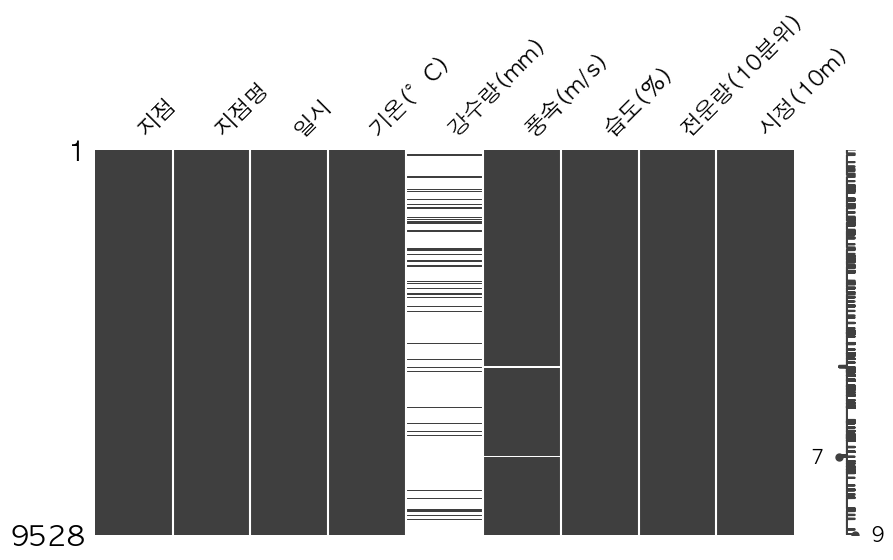

In [30]:
# 결측치 시각화
msno.matrix(weather_data, figsize=(10,5))
plt.show()

In [31]:
# 일시가 Object type이므로 datetime으로 변환
weather_data['일시'] = pd.to_datetime(weather_data['일시'])

# 강수량의 NaN 값을 0으로 채움
weather_data['강수량(mm)'].fillna(0, inplace=True)

# 풍속의 NaN값을 전날 데이터로 채움
weather_data["풍속(m/s)"].fillna(method="ffill", inplace=True)

# 결과 확인
weather_data

지점 지점명                  일시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  전운량(10분위)  \
0     108  서울 2023-05-01 00:00:00    12.1      0.0      2.8     87          9   
1     108  서울 2023-05-01 01:00:00    11.6      0.0      2.9     88          6   
2     108  서울 2023-05-01 02:00:00    11.0      0.0      2.3     90          6   
3     108  서울 2023-05-01 03:00:00    10.8      0.0      1.9     91          8   
4     108  서울 2023-05-01 04:00:00    10.4      0.0      2.2     92          8   
...   ...  ..                 ...     ...      ...      ...    ...        ...   
9523  108  서울 2024-05-31 19:00:00    18.7      1.0      2.7     65          8   
9524  108  서울 2024-05-31 20:00:00    18.4      0.0      1.2     68          8   
9525  108  서울 2024-05-31 21:00:00    18.7      0.0      2.5     67          9   
9526  108  서울 2024-05-31 22:00:00    18.8      0.0      2.3     73         10   
9527  108  서울 2024-05-31 23:00:00    18.4      0.0      2.8     80         10   

      시정(10m)  
0        1049  
1         957  
2         778  
3         672  
4         633  
...       ...  
9523     3671  
9524     3216  
9525     3449  
9526     2528  
9527      963  

[9528 rows x 9 columns]

In [32]:
# 정보 확인
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         9528 non-null   int64         
 1   지점명        9528 non-null   object        
 2   일시         9528 non-null   datetime64[ns]
 3   기온(°C)     9528 non-null   float64       
 4   강수량(mm)    9528 non-null   float64       
 5   풍속(m/s)    9528 non-null   float64       
 6   습도(%)      9528 non-null   int64         
 7   전운량(10분위)  9528 non-null   int64         
 8   시정(10m)    9528 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 670.1+ KB


> 결측치를 해결한 것을 알 수 있다.

In [33]:
# 연, 월, 일 휴일여부 컬럼 추가
weather_data['연'] = weather_data['일시'].dt.year
weather_data['월'] = weather_data['일시'].dt.month
weather_data['일'] = weather_data['일시'].dt.day
weather_data['휴일여부'] = weather_data['일시'].dt.weekday.apply(lambda x: '휴일' if x >= 5 else '평일')

weather_data

지점 지점명                  일시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  전운량(10분위)  \
0     108  서울 2023-05-01 00:00:00    12.1      0.0      2.8     87          9   
1     108  서울 2023-05-01 01:00:00    11.6      0.0      2.9     88          6   
2     108  서울 2023-05-01 02:00:00    11.0      0.0      2.3     90          6   
3     108  서울 2023-05-01 03:00:00    10.8      0.0      1.9     91          8   
4     108  서울 2023-05-01 04:00:00    10.4      0.0      2.2     92          8   
...   ...  ..                 ...     ...      ...      ...    ...        ...   
9523  108  서울 2024-05-31 19:00:00    18.7      1.0      2.7     65          8   
9524  108  서울 2024-05-31 20:00:00    18.4      0.0      1.2     68          8   
9525  108  서울 2024-05-31 21:00:00    18.7      0.0      2.5     67          9   
9526  108  서울 2024-05-31 22:00:00    18.8      0.0      2.3     73         10   
9527  108  서울 2024-05-31 23:00:00    18.4      0.0      2.8     80         10   

      시정(10m)     연  월   일 휴일여부  
0        1049  2023  5   1   평일  
1         957  2023  5   1   평일  
2         778  2023  5   1   평일  
3         672  2023  5   1   평일  
4         633  2023  5   1   평일  
...       ...   ... ..  ..  ...  
9523     3671  2024  5  31   평일  
9524     3216  2024  5  31   평일  
9525     3449  2024  5  31   평일  
9526     2528  2024  5  31   평일  
9527      963  2024  5  31   평일  

[9528 rows x 13 columns]

#### mearged_data 와 weather_data 병합

In [34]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         9528 non-null   int64         
 1   지점명        9528 non-null   object        
 2   일시         9528 non-null   datetime64[ns]
 3   기온(°C)     9528 non-null   float64       
 4   강수량(mm)    9528 non-null   float64       
 5   풍속(m/s)    9528 non-null   float64       
 6   습도(%)      9528 non-null   int64         
 7   전운량(10분위)  9528 non-null   int64         
 8   시정(10m)    9528 non-null   int64         
 9   연          9528 non-null   int32         
 10  월          9528 non-null   int32         
 11  일          9528 non-null   int32         
 12  휴일여부       9528 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(3), int64(4), object(2)
memory usage: 856.2+ KB


In [35]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348 entries, 0 to 8347
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여소     8348 non-null   object        
 1   날짜      8348 non-null   datetime64[ns]
 2   시간대     8348 non-null   int32         
 3   대여대수    8348 non-null   float64       
 4   반납대수    8348 non-null   float64       
 5   연       8348 non-null   int32         
 6   월       8348 non-null   int32         
 7   일       8348 non-null   int32         
 8   휴일여부    8348 non-null   object        
 9   계절      8348 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(4), object(3)
memory usage: 521.9+ KB


In [36]:
# 원본 데이터와 컬럼 일치 작업

# weather_data의 시간대를 추출하여 새로운 컬럼 추가
weather_data['시간대'] = pd.to_datetime(weather_data['일시']).dt.hour

# weather_data의 날짜를 추출하여 새로운 컬럼 추가
weather_data['날짜'] = pd.to_datetime(weather_data['일시'])

# 병합
songpa_station = pd.merge(
    merged_data,
    weather_data[['날짜', '연', '월', '일', '시간대', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '전운량(10분위)', '시정(10m)']],
    on = ['연' ,'월', '일','시간대'],
    how='left'
)

songpa_station

대여소       날짜_x  시간대  대여대수  반납대수     연  월   일 휴일여부  계절  \
0     송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄   
1     송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄   
2     송파구청 2023-05-01    2   3.0   0.0  2023  5   1   평일   봄   
3     송파구청 2023-05-01    3   2.0   0.0  2023  5   1   평일   봄   
4     송파구청 2023-05-01    4   2.0   0.0  2023  5   1   평일   봄   
...    ...        ...  ...   ...   ...   ... ..  ..  ...  ..   
8343  송파구청 2024-05-31   21  13.0  15.0  2024  5  31   평일   봄   
8344  송파구청 2024-05-31   22   8.0   7.0  2024  5  31   평일   봄   
8345  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄   
8346  송파구청 2024-06-01    0   0.0   1.0  2024  6   1   휴일  여름   
8347  송파구청 2024-06-01    5   0.0   1.0  2024  6   1   휴일  여름   

                    날짜_y  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  전운량(10분위)  시정(10m)  
0    2023-05-01 00:00:00    12.1      0.0      2.8   87.0        9.0   1049.0  
1    2023-05-01 01:00:00    11.6      0.0      2.9   88.0        6.0    957.0  
2    2023-05-01 02:00:00    11.0      0.0      2.3   90.0        6.0    778.0  
3    2023-05-01 03:00:00    10.8      0.0      1.9   91.0        8.0    672.0  
4    2023-05-01 04:00:00    10.4      0.0      2.2   92.0        8.0    633.0  
...                  ...     ...      ...      ...    ...        ...      ...  
8343 2024-05-31 21:00:00    18.7      0.0      2.5   67.0        9.0   3449.0  
8344 2024-05-31 22:00:00    18.8      0.0      2.3   73.0       10.0   2528.0  
8345 2024-05-31 23:00:00    18.4      0.0      2.8   80.0       10.0    963.0  
8346                 NaT     NaN      NaN      NaN    NaN        NaN      NaN  
8347                 NaT     NaN      NaN      NaN    NaN        NaN      NaN  

[8348 rows x 17 columns]

In [37]:
# 중복 컬럼 제거 및 컬럼 이름 변경

# '날짜_y' 컬럼 제거 
songpa_station.drop(columns=['날짜_y'], inplace=True)
# '날짜_x' 컬럼 날짜 컬럼으로 이름 변경
songpa_station.rename(columns={'날짜_x': '날짜'}, inplace=True)

In [38]:
songpa_station

대여소         날짜  시간대  대여대수  반납대수     연  월   일 휴일여부  계절  기온(°C)  강수량(mm)  \
0     송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄    12.1      0.0   
1     송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄    11.6      0.0   
2     송파구청 2023-05-01    2   3.0   0.0  2023  5   1   평일   봄    11.0      0.0   
3     송파구청 2023-05-01    3   2.0   0.0  2023  5   1   평일   봄    10.8      0.0   
4     송파구청 2023-05-01    4   2.0   0.0  2023  5   1   평일   봄    10.4      0.0   
...    ...        ...  ...   ...   ...   ... ..  ..  ...  ..     ...      ...   
8343  송파구청 2024-05-31   21  13.0  15.0  2024  5  31   평일   봄    18.7      0.0   
8344  송파구청 2024-05-31   22   8.0   7.0  2024  5  31   평일   봄    18.8      0.0   
8345  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄    18.4      0.0   
8346  송파구청 2024-06-01    0   0.0   1.0  2024  6   1   휴일  여름     NaN      NaN   
8347  송파구청 2024-06-01    5   0.0   1.0  2024  6   1   휴일  여름     NaN      NaN   

      풍속(m/s)  습도(%)  전운량(10분위)  시정(10m)  
0         2.8   87.0        9.0   1049.0  
1         2.9   88.0        6.0    957.0  
2         2.3   90.0        6.0    778.0  
3         1.9   91.0        8.0    672.0  
4         2.2   92.0        8.0    633.0  
...       ...    ...        ...      ...  
8343      2.5   67.0        9.0   3449.0  
8344      2.3   73.0       10.0   2528.0  
8345      2.8   80.0       10.0    963.0  
8346      NaN    NaN        NaN      NaN  
8347      NaN    NaN        NaN      NaN  

[8348 rows x 16 columns]

#### 강수량 분포

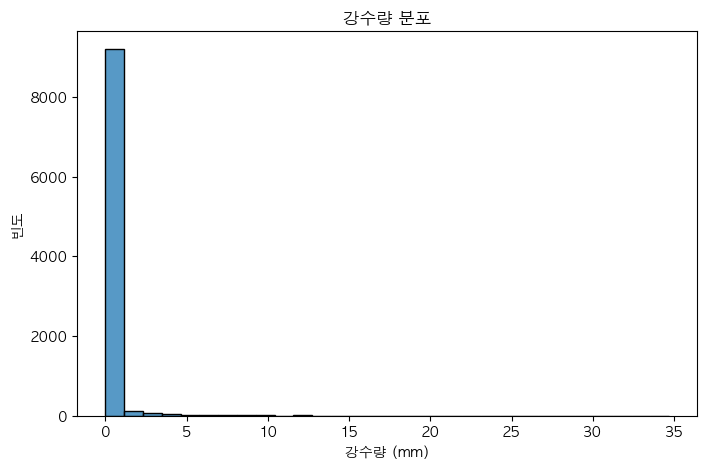

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 강수량 분포 확인
plt.figure(figsize=(8, 5))
sns.histplot(weather_data['강수량(mm)'], bins=30, kde=False)
plt.title('강수량 분포')
plt.xlabel('강수량 (mm)')
plt.ylabel('빈도')
plt.show()

> 비가 안온날이 거의 많은 것을 알 수 있다.

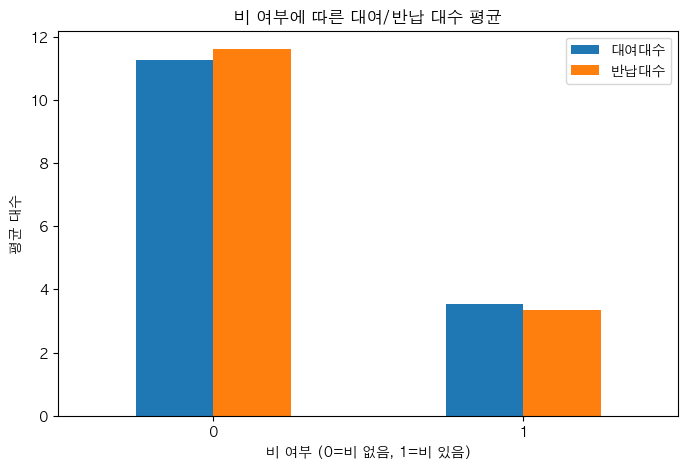

In [40]:
# 강수량 여부 추가
songpa_station['강수여부'] = songpa_station['강수량(mm)'].apply(lambda x: 1 if x > 0 else 0)

# 비가 온 날과 안 온 날의 대여/반납 대수 평균
rain_effect = songpa_station.groupby('강수여부')[['대여대수', '반납대수']].mean()

# 시각화
rain_effect.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('비 여부에 따른 대여/반납 대수 평균')
plt.xlabel('비 여부 (0=비 없음, 1=비 있음)')
plt.ylabel('평균 대수')
plt.show()

> 비가 없을때 평균 대수가 높은 것을 확인해 볼 수 있다.

#### 날씨를 추가한 상관관계 HeatMap

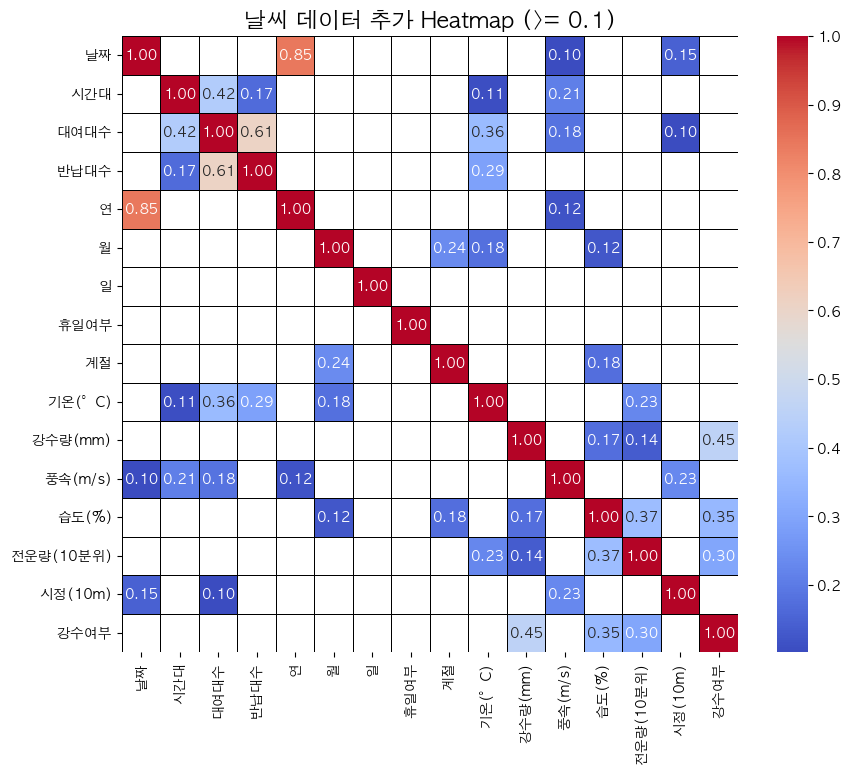

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 상관계수 계산 및 필터링
correlation_matrix = songpa_station.replace(
    {'평일': 0, '휴일': 1, '비 없음': 0, '비 있음': 1, '봄': 0, '여름': 1, '가을' : 2, '겨울': 3}
).drop(columns='대여소').corr()
filtered_correlation = correlation_matrix.where(correlation_matrix >= 0.1, np.nan)

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_correlation,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True,
    mask=filtered_correlation.isnull(),
    linewidths=0.5,  # 박스 경계선 강조
    linecolor='black',  # 경계선 색상 설정
    square=True  # 정사각형 박스
)
plt.title('날씨 데이터 추가 Heatmap (>= 0.1)', fontsize=16)
plt.show()

> 따릉이는 비가 오는 날에 타지 않을 것으로 예상해서 상관관계가 높을 것으로 예측했지만 현재 오지 않은 날이 nan으로 처리되어      
nan을 0으로 대치했더니 상관관계가 거의 없는 것으로 확인.            
전처리에 대한 적절한 방법인 이진분류로 하였지만 상관관계가 나타나지 않았다.        
이는 추가 분석이 필요해 보임.

#### 상관관계 산점도

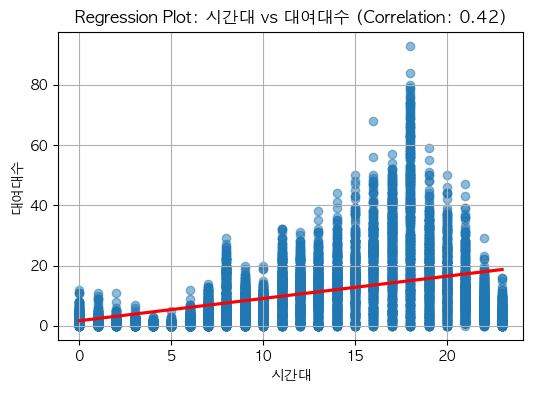

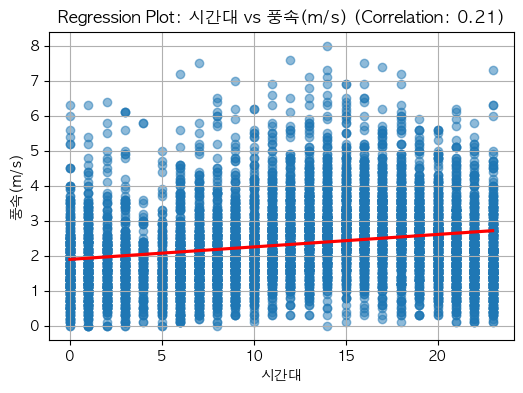

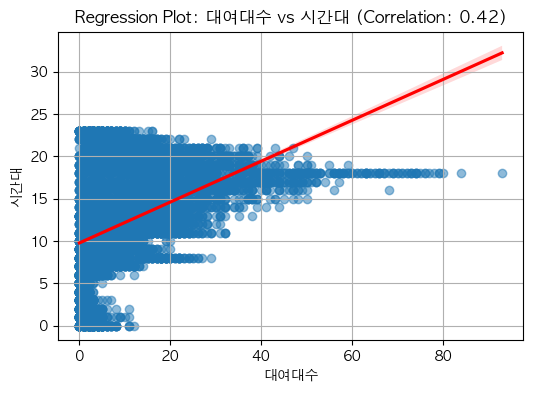

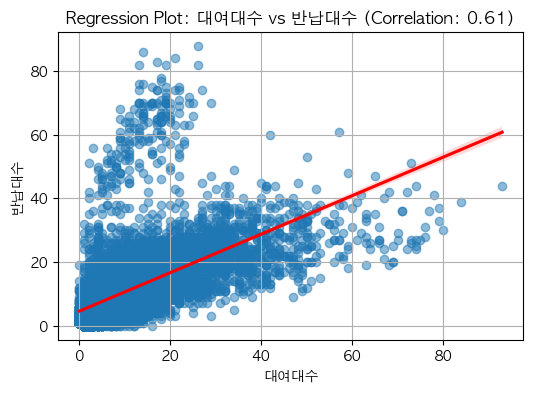

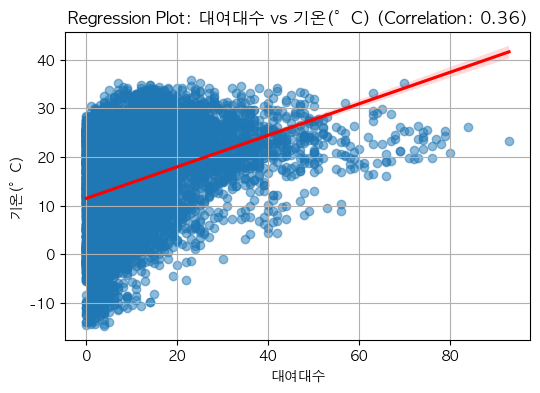

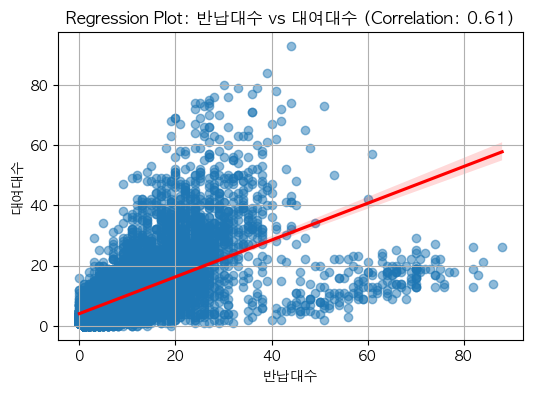

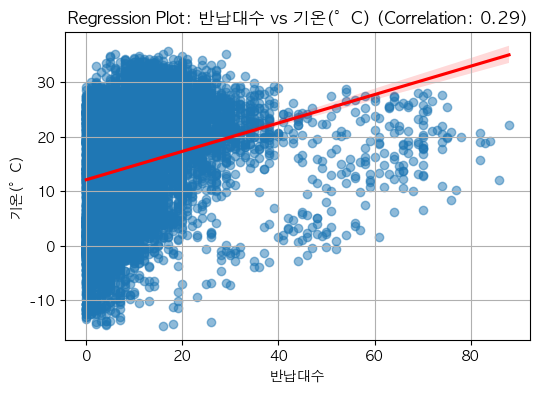

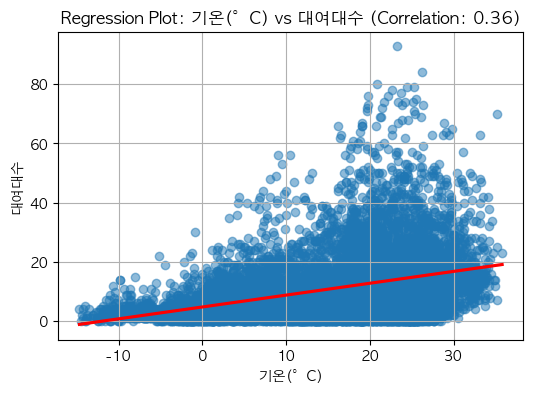

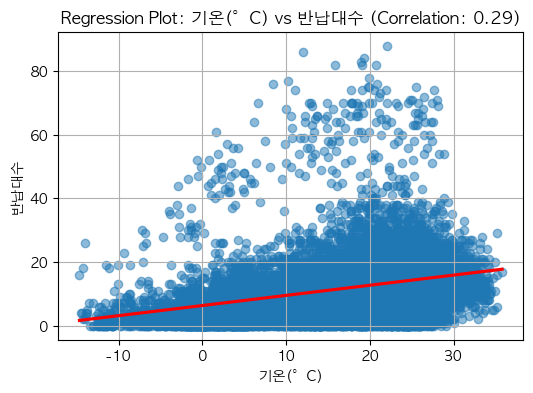

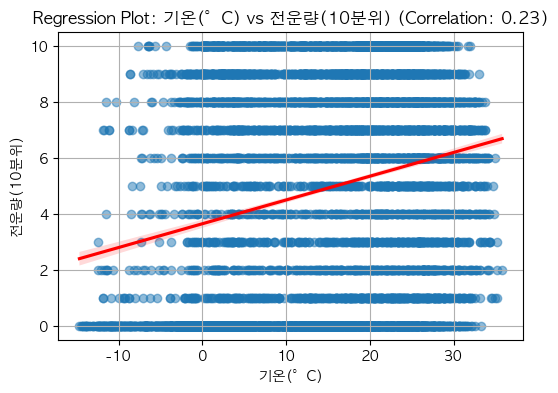

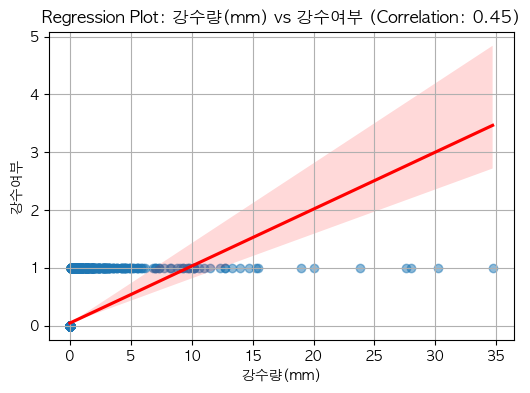

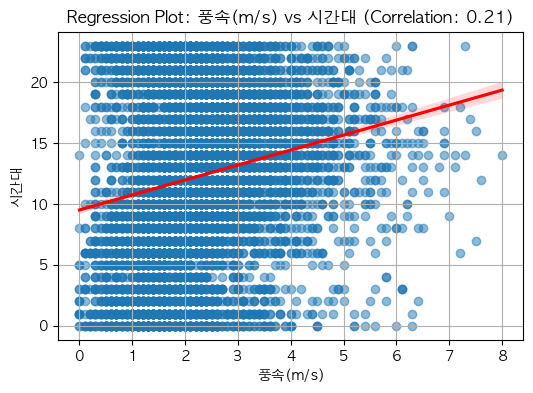

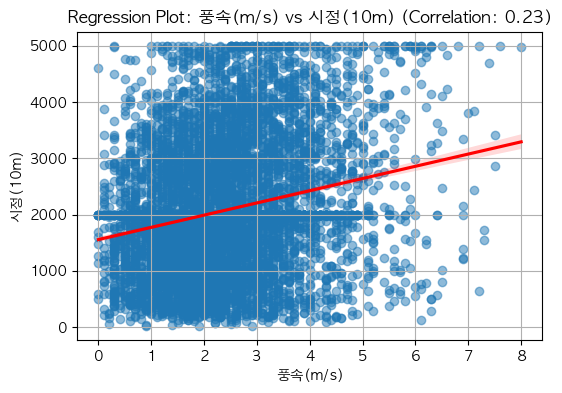

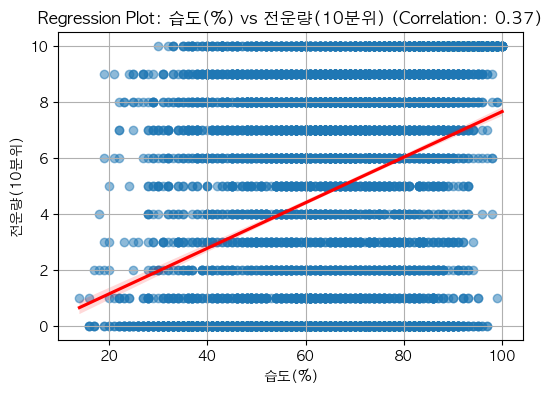

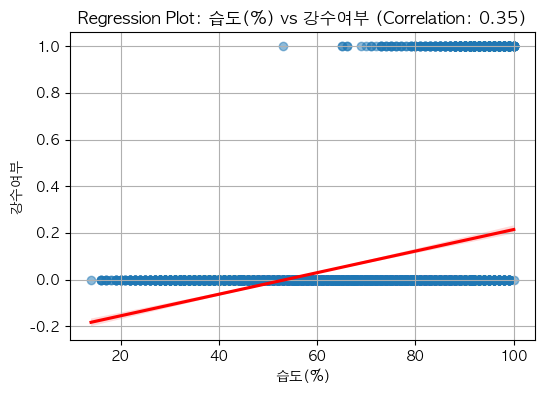

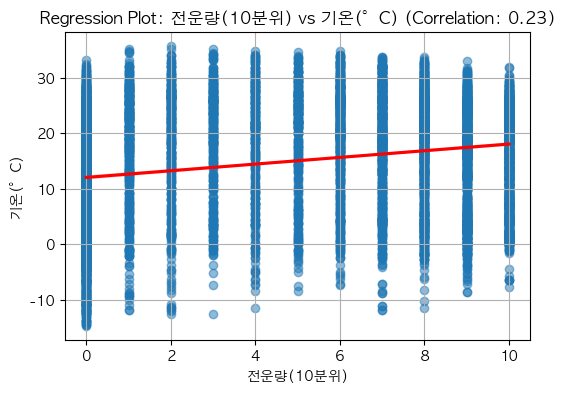

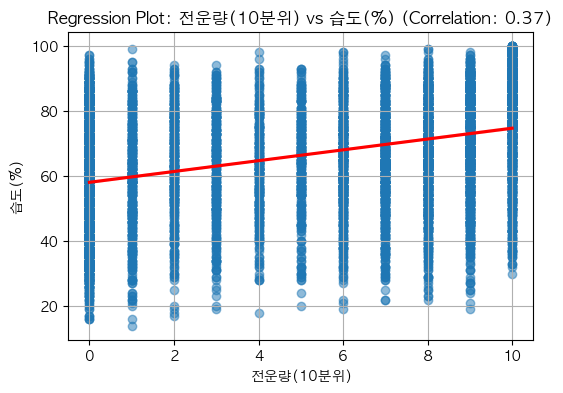

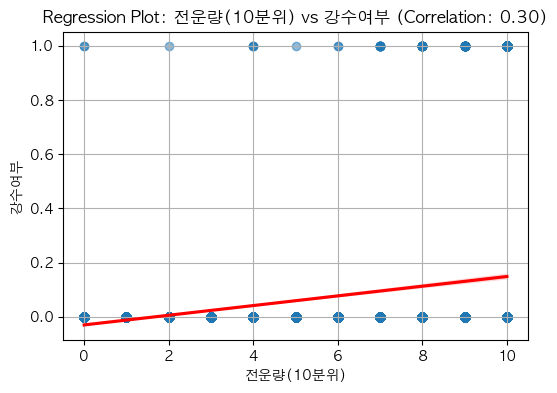

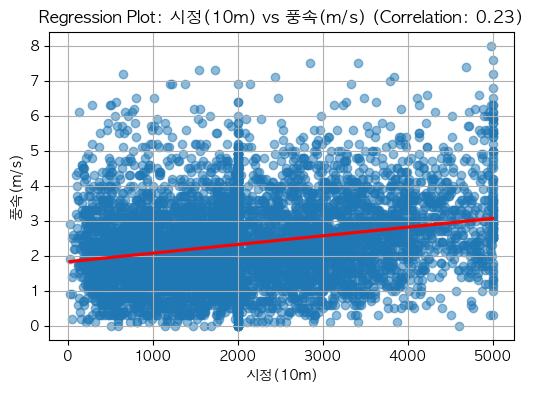

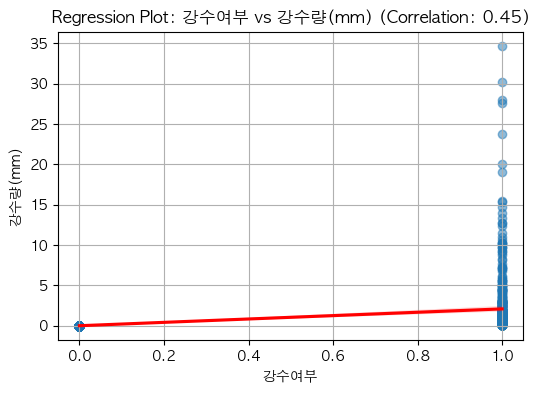

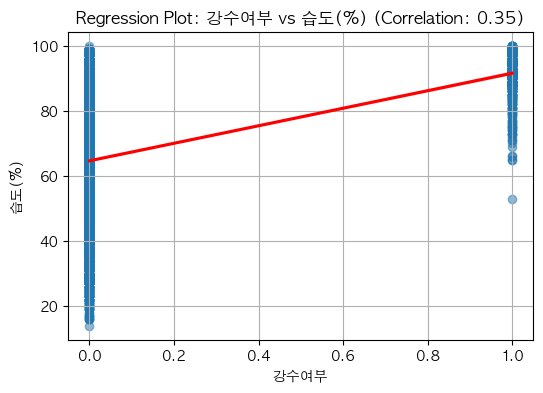

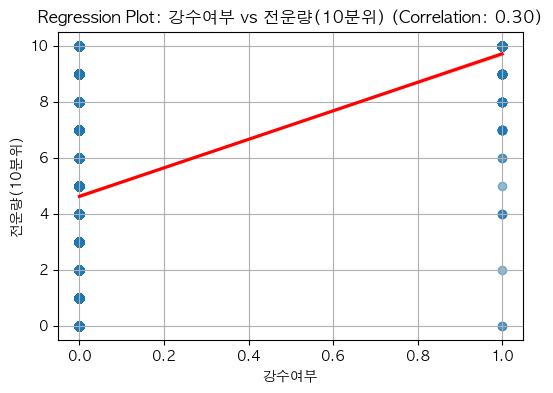

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 데이터 추출
numeric_data = songpa_station.replace(
    {'평일': 0, '휴일': 1}
).select_dtypes(include=[np.number])
correlations = numeric_data.corr().stack().reset_index()
correlations.columns = ['Variable1', 'Variable2', 'Correlation']
correlations = correlations[
    (correlations['Correlation'] > 0.2) & (correlations['Variable1'] != correlations['Variable2'])
]

# 산점도 + 회귀선 그리기
for _, row in correlations.iterrows():
    var1 = row['Variable1']
    var2 = row['Variable2']
    
    plt.figure(figsize=(6, 4))
    sns.regplot(
        x=var1, y=var2, data=numeric_data,
        line_kws={"color": "red"}, scatter_kws={"alpha": 0.5}
    )
    plt.title(f'Regression Plot: {var1} vs {var2} (Correlation: {row["Correlation"]:.2f})')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()

#### 날씨 데이터 결론
- 날씨 데이터에서는 기온말고는 전부다 상관관계가 없는 것으로 보임.      
**따라서, 기온을 제외한 컬럼을 제거해주도록 하겠음**

In [43]:
# 컬럼 제거
songpa_station.drop(columns=['강수량(mm)','풍속(m/s)', '습도(%)', '전운량(10분위)', '시정(10m)', '강수여부'], inplace=True)

# 데이터 확인
songpa_station

대여소         날짜  시간대  대여대수  반납대수     연  월   일 휴일여부  계절  기온(°C)
0     송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄    12.1
1     송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄    11.6
2     송파구청 2023-05-01    2   3.0   0.0  2023  5   1   평일   봄    11.0
3     송파구청 2023-05-01    3   2.0   0.0  2023  5   1   평일   봄    10.8
4     송파구청 2023-05-01    4   2.0   0.0  2023  5   1   평일   봄    10.4
...    ...        ...  ...   ...   ...   ... ..  ..  ...  ..     ...
8343  송파구청 2024-05-31   21  13.0  15.0  2024  5  31   평일   봄    18.7
8344  송파구청 2024-05-31   22   8.0   7.0  2024  5  31   평일   봄    18.8
8345  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄    18.4
8346  송파구청 2024-06-01    0   0.0   1.0  2024  6   1   휴일  여름     NaN
8347  송파구청 2024-06-01    5   0.0   1.0  2024  6   1   휴일  여름     NaN

[8348 rows x 11 columns]

In [44]:
# 데이터 저장
songpa_station.to_csv("../../data/songpa_station_weather_merge.csv")

## 초미세먼지 데이터
- [서울시 대기환경정보 일별 평균](https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123)       
- 날씨 데이터에서도 상관관계를 가지는 feature를 기온밖에 찾지 못함으로 초미세먼지 데이터를 사용해보겠다.

### 컬럼 설명
    1. SO₂ (이산화황, Sulfur Dioxide)
        - 높은 농도는 호흡기 질환 유발, 산성비의 주요 원인.
    2. CO (일산화탄소, Carbon Monoxide)
        - 산소 운반 능력 감소.
    3. O₃ (오존, Ozone)
        - 높은 농도는 호흡기 자극.
    4. NO₂ (이산화질소, Nitrogen Dioxide)
        - 호흡기 질환 악화, 오존 및 미세먼지 생성의 전구물질.
    5.  PM₁₀(미세먼지, Particulate Matter 10)
        - 호흡기 질환 및 심혈관 질환 유발.
    6.  PM₂.₅ (초미세먼지, Particulate Matter 2.5)
        - 폐 깊숙이 침투하여 호흡기 및 심혈관 질환, 암을 유발할 수 있음.

In [45]:
# 데이터 불러오기 
airpollution_data = pd.read_csv("../../data/초미세먼지 데이터.csv")

# 데이터 확인
airpollution_data

지역     망   측정소코드 측정소명     SO2    CO      O3     NO2  PM10  PM25  \
0     서울 송파구  도시대기  111273  송파구  0.0021  0.42  0.0488  0.0126  67.0  30.0   
1     서울 송파구  도시대기  111273  송파구  0.0022  0.42  0.0438  0.0129  66.0  26.0   
2     서울 송파구  도시대기  111273  송파구  0.0020  0.40  0.0418  0.0123  64.0  28.0   
3     서울 송파구  도시대기  111273  송파구  0.0020  0.40  0.0331  0.0152  58.0  22.0   
4     서울 송파구  도시대기  111273  송파구  0.0021  0.39  0.0334  0.0123  56.0  22.0   
...      ...   ...     ...  ...     ...   ...     ...     ...   ...   ...   
9523  서울 송파구  도시대기  111273  송파구  0.0022  0.24  0.0494  0.0143  17.0   4.0   
9524  서울 송파구  도시대기  111273  송파구  0.0021  0.22  0.0503  0.0114  10.0   1.0   
9525  서울 송파구  도시대기  111273  송파구  0.0020  0.22  0.0507  0.0091  13.0   4.0   
9526  서울 송파구  도시대기  111273  송파구  0.0023  0.26  0.0487  0.0092  16.0  11.0   
9527  서울 송파구  도시대기  111273  송파구  0.0022  0.29  0.0465  0.0081  23.0   9.0   

                    주소        date  시간  
0     서울 송파구 백제고분로 236  2023-05-01   1  
1     서울 송파구 백제고분로 236  2023-05-01   2  
2     서울 송파구 백제고분로 236  2023-05-01   3  
3     서울 송파구 백제고분로 236  2023-05-01   4  
4     서울 송파구 백제고분로 236  2023-05-01   5  
...                ...         ...  ..  
9523  서울 송파구 백제고분로 236  2024-05-31  20  
9524  서울 송파구 백제고분로 236  2024-05-31  21  
9525  서울 송파구 백제고분로 236  2024-05-31  22  
9526  서울 송파구 백제고분로 236  2024-05-31  23  
9527  서울 송파구 백제고분로 236  2024-05-31  24  

[9528 rows x 13 columns]

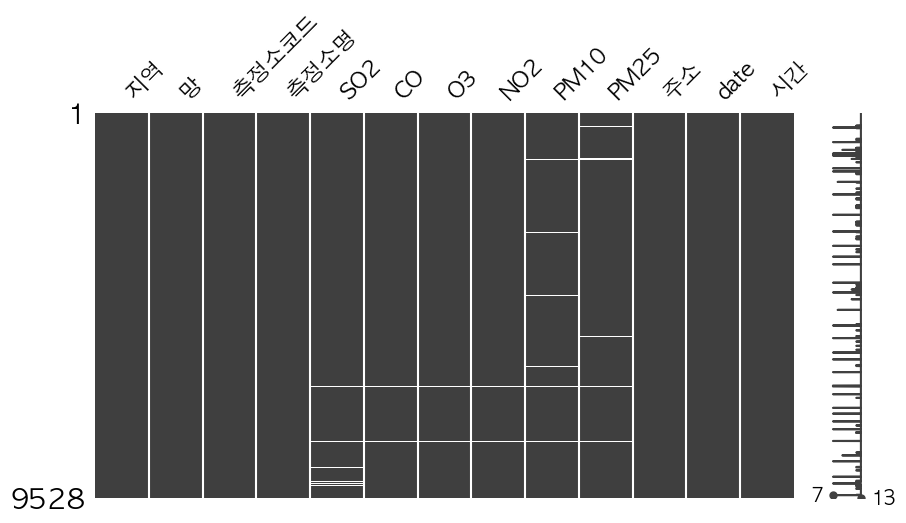

In [46]:
# 결측치 시각화
msno.matrix(airpollution_data, figsize=(10,5))
plt.show()

> 결측치의 개수가 많지 않으므로 전 행의 데이터로 대치

In [47]:
# 결측치 처리
airpollution_data = airpollution_data.fillna(method='ffill')  # 이전 행의 데이터로 결측치 대치

# 결과 확인
print(airpollution_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      9528 non-null   object 
 1   망       9528 non-null   object 
 2   측정소코드   9528 non-null   int64  
 3   측정소명    9528 non-null   object 
 4   SO2     9528 non-null   float64
 5   CO      9528 non-null   float64
 6   O3      9528 non-null   float64
 7   NO2     9528 non-null   float64
 8   PM10    9528 non-null   float64
 9   PM25    9528 non-null   float64
 10  주소      9528 non-null   object 
 11  date    9528 non-null   object 
 12  시간      9528 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 967.8+ KB
None


In [48]:
# 필요없는 컬럼 삭제
airpollution_data.drop(columns=['지역', '망','측정소코드','측정소명','주소'], inplace=True)

In [49]:
# 컬럼 이름 일치시키기 (merge for olympic_park_station)
# ['date'] : object type => datetime type
airpollution_data['date'] = pd.to_datetime(airpollution_data['date'])

# rename
airpollution_data.rename(columns={'date' : '날짜', '시간' : '시간대'}, inplace=True)

In [50]:
# 시간대 일치시키기
airpollution_data['시간대'] = airpollution_data['시간대'].replace({24:0})

# 데이터 확인
airpollution_data['시간대'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0])

In [51]:
# 데이터 병합
songpa_station = pd.merge(
    songpa_station,
    airpollution_data,
    on=['날짜', '시간대'],
    how= 'left'
)

# 데이터 확인
songpa_station

대여소         날짜  시간대  대여대수  반납대수     연  월   일 휴일여부  계절  기온(°C)     SO2  \
0     송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄    12.1  0.0022   
1     송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄    11.6  0.0021   
2     송파구청 2023-05-01    2   3.0   0.0  2023  5   1   평일   봄    11.0  0.0022   
3     송파구청 2023-05-01    3   2.0   0.0  2023  5   1   평일   봄    10.8  0.0020   
4     송파구청 2023-05-01    4   2.0   0.0  2023  5   1   평일   봄    10.4  0.0020   
...    ...        ...  ...   ...   ...   ... ..  ..  ...  ..     ...     ...   
8343  송파구청 2024-05-31   21  13.0  15.0  2024  5  31   평일   봄    18.7  0.0021   
8344  송파구청 2024-05-31   22   8.0   7.0  2024  5  31   평일   봄    18.8  0.0020   
8345  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄    18.4  0.0023   
8346  송파구청 2024-06-01    0   0.0   1.0  2024  6   1   휴일  여름     NaN     NaN   
8347  송파구청 2024-06-01    5   0.0   1.0  2024  6   1   휴일  여름     NaN     NaN   

        CO      O3     NO2  PM10  PM25  
0     0.43  0.0153  0.0394  29.0  12.0  
1     0.42  0.0488  0.0126  67.0  30.0  
2     0.42  0.0438  0.0129  66.0  26.0  
3     0.40  0.0418  0.0123  64.0  28.0  
4     0.40  0.0331  0.0152  58.0  22.0  
...    ...     ...     ...   ...   ...  
8343  0.22  0.0503  0.0114  10.0   1.0  
8344  0.22  0.0507  0.0091  13.0   4.0  
8345  0.26  0.0487  0.0092  16.0  11.0  
8346   NaN     NaN     NaN   NaN   NaN  
8347   NaN     NaN     NaN   NaN   NaN  

[8348 rows x 17 columns]

#### 대기질 데이터를 합친 상관계수 분석

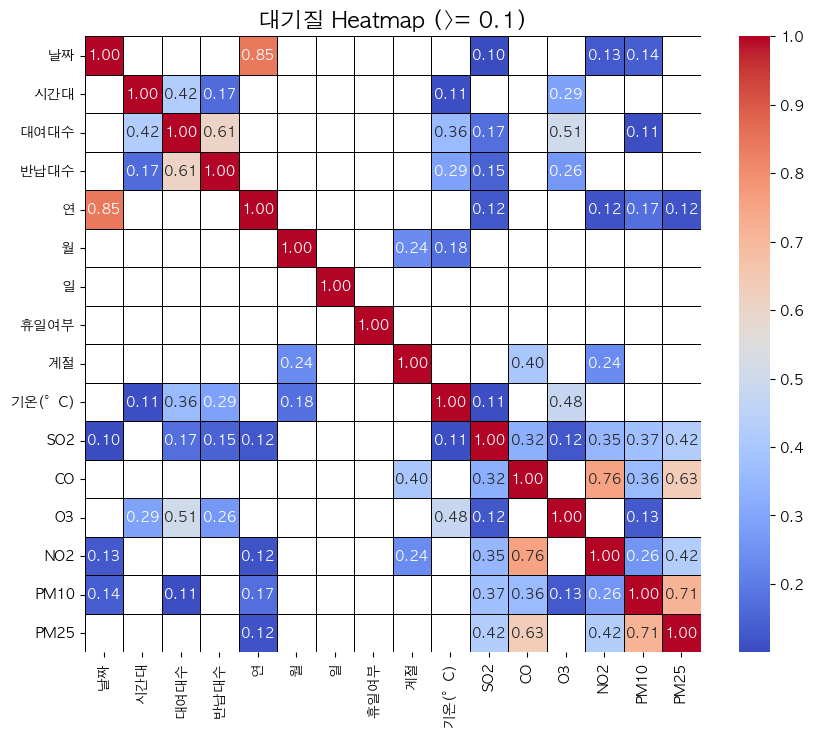

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 상관계수 계산 및 필터링
correlation_matrix = songpa_station.replace(
    {'평일': 0, '휴일': 1, '봄': 0, '여름': 1, '가을': 2, '겨울' : 3}
).drop(columns='대여소').corr()
filtered_correlation = correlation_matrix.where(correlation_matrix >= 0.1, np.nan)

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_correlation,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True,
    mask=filtered_correlation.isnull(),
    linewidths=0.5,  # 박스 경계선 강조
    linecolor='black',  # 경계선 색상 설정
    square=True  # 정사각형 박스
)
plt.title('대기질 Heatmap (>= 0.1)', fontsize=16)
plt.show()

> 대기질 데이터에서는 O₃(오존, Ozone)가 약상관을 보이며 나머지는 상관관계가 없는 것으로 보임.

In [53]:
# 상관간계 없는 컬럼 삭제
songpa_station.drop(columns=['SO2', 'CO', 'NO2', 'PM10', 'PM25'], inplace=True)

# 데이터 저장
songpa_station.to_csv("../../data/songpa_weather_airpollution_merge.csv")

---
## 잠실 4동,6동 인구데이터 활용
[행정동 단위 서울 생활인구(내국인)](https://data.seoul.go.kr/dataList/OA-14991/S/1/datasetView.do#)
- 메인 feature를 찾지못하여 송파구청에 해당되는 인구데이터 활용    
- 시간대별로 유동인구를 파악해서 상관관계를 분석해보겠습니다.
- 잠실4동과 6동 경계선에 위치해있으므로 둘의 인구데이터를 합쳐서 사용

**동별 코드**
- 11710690
- 11710710

In [54]:
import pandas as pd
from datetime import datetime, timedelta

# 결과를 저장할 리스트
filtered_data_list = []

# 시작 연월과 종료 연월 설정
start_date = datetime(2023, 5, 1)  # 202305
end_date = datetime(2024, 5, 1)    # 202405

# 시작부터 종료까지 한 달 단위로 반복
current_date = start_date
while current_date <= end_date:
    # 연월(YYYYMM) 형식으로 파일명 생성
    year_month = current_date.strftime("%Y%m")
    file_path = f"../../data/person/LOCAL_PEOPLE_DONG_{year_month}.csv"
    
    try:
        # 파일 읽기
        olympic_people = pd.read_csv(file_path, index_col=False)
        
        # 필요 없는 열 제거
        olympic_people_drop = olympic_people.iloc[:, 4:]
        olympic_people.drop(columns=olympic_people_drop.columns, inplace=True)
        
        # 조건 필터링
        filtered_data = olympic_people[
            (olympic_people['행정동코드'] == 11710690) | 
            (olympic_people['행정동코드'] == 11710710)
        ]
        
        # 결과 저장
        filtered_data_list.append(filtered_data)
    except FileNotFoundError:
        # 파일이 없을 경우 예외 처리
        print(f"File not found: {file_path}")
    except Exception as e:
        # 기타 에러 처리
        print(f"Error processing file {file_path}: {e}")
    
    # 한 달 추가
    next_month = current_date.month % 12 + 1
    next_year = current_date.year + (current_date.month // 12)
    current_date = datetime(next_year, next_month, 1)

# 필터링된 모든 데이터를 하나의 DataFrame으로 합치기
songpa_people_count = pd.concat(filtered_data_list, ignore_index=True)

In [55]:
# 행정동코드 필터링
filtered_data = songpa_people_count[(songpa_people_count['행정동코드'] == 11710690) | (songpa_people_count['행정동코드'] == 11710710)]

# 그룹화 및 합산
songpa_people_count = filtered_data.groupby(['기준일ID', '시간대구분'], as_index=False)['총생활인구수'].sum()

# 결과 확인
songpa_people_count

기준일ID  시간대구분      총생활인구수
0     20230501      0  47058.7030
1     20230501      1  46312.8268
2     20230501      2  46316.7649
3     20230501      3  46259.5321
4     20230501      4  45971.5226
...        ...    ...         ...
9523  20240531     19  64765.9702
9524  20240531     20  60810.3940
9525  20240531     21  56286.3693
9526  20240531     22  53048.9262
9527  20240531     23  49750.3319

[9528 rows x 3 columns]

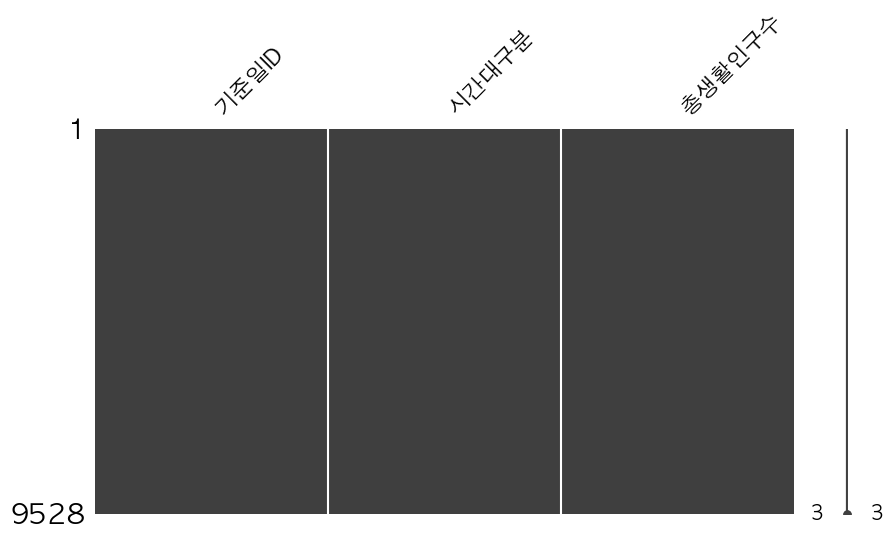

In [56]:
# 인구데이터 결측치 확인

# 결측치 시각화
msno.matrix(songpa_people_count, figsize=(10,5))
plt.show()

> 인구 데이터에는 결측치가 없다는 것을 확인 할 수 있다.

In [57]:
songpa_people_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일ID   9528 non-null   int64  
 1   시간대구분   9528 non-null   int64  
 2   총생활인구수  9528 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 223.4 KB


In [58]:
# 컬럼 일치시키기 (for merge)
songpa_people_count.rename(columns={'기준일ID':'날짜', '시간대구분':'시간대'},inplace=True)

# type 변환
songpa_people_count['날짜'] = pd.to_datetime(songpa_people_count['날짜'], format='%Y%m%d')

# 데이터 확인
songpa_people_count

날짜  시간대      총생활인구수
0    2023-05-01    0  47058.7030
1    2023-05-01    1  46312.8268
2    2023-05-01    2  46316.7649
3    2023-05-01    3  46259.5321
4    2023-05-01    4  45971.5226
...         ...  ...         ...
9523 2024-05-31   19  64765.9702
9524 2024-05-31   20  60810.3940
9525 2024-05-31   21  56286.3693
9526 2024-05-31   22  53048.9262
9527 2024-05-31   23  49750.3319

[9528 rows x 3 columns]

In [59]:
# 데이터 병합
songpa_station = pd.merge(
    songpa_station,
    songpa_people_count,
    on=['날짜', '시간대'],
    how='left'
)

# 데이터 확인
songpa_station

대여소         날짜  시간대  대여대수  반납대수     연  월   일 휴일여부  계절  기온(°C)      O3  \
0     송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄    12.1  0.0153   
1     송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄    11.6  0.0488   
2     송파구청 2023-05-01    2   3.0   0.0  2023  5   1   평일   봄    11.0  0.0438   
3     송파구청 2023-05-01    3   2.0   0.0  2023  5   1   평일   봄    10.8  0.0418   
4     송파구청 2023-05-01    4   2.0   0.0  2023  5   1   평일   봄    10.4  0.0331   
...    ...        ...  ...   ...   ...   ... ..  ..  ...  ..     ...     ...   
8343  송파구청 2024-05-31   21  13.0  15.0  2024  5  31   평일   봄    18.7  0.0503   
8344  송파구청 2024-05-31   22   8.0   7.0  2024  5  31   평일   봄    18.8  0.0507   
8345  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄    18.4  0.0487   
8346  송파구청 2024-06-01    0   0.0   1.0  2024  6   1   휴일  여름     NaN     NaN   
8347  송파구청 2024-06-01    5   0.0   1.0  2024  6   1   휴일  여름     NaN     NaN   

          총생활인구수  
0     47058.7030  
1     46312.8268  
2     46316.7649  
3     46259.5321  
4     45971.5226  
...          ...  
8343  56286.3693  
8344  53048.9262  
8345  49750.3319  
8346         NaN  
8347         NaN  

[8348 rows x 13 columns]

#### 인구수 데이터 상관관계 분석

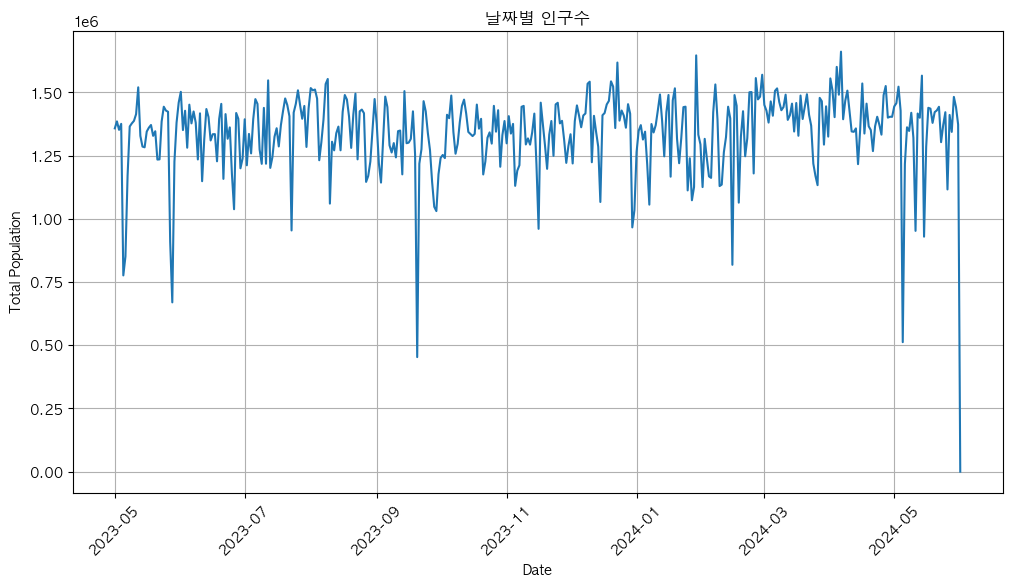

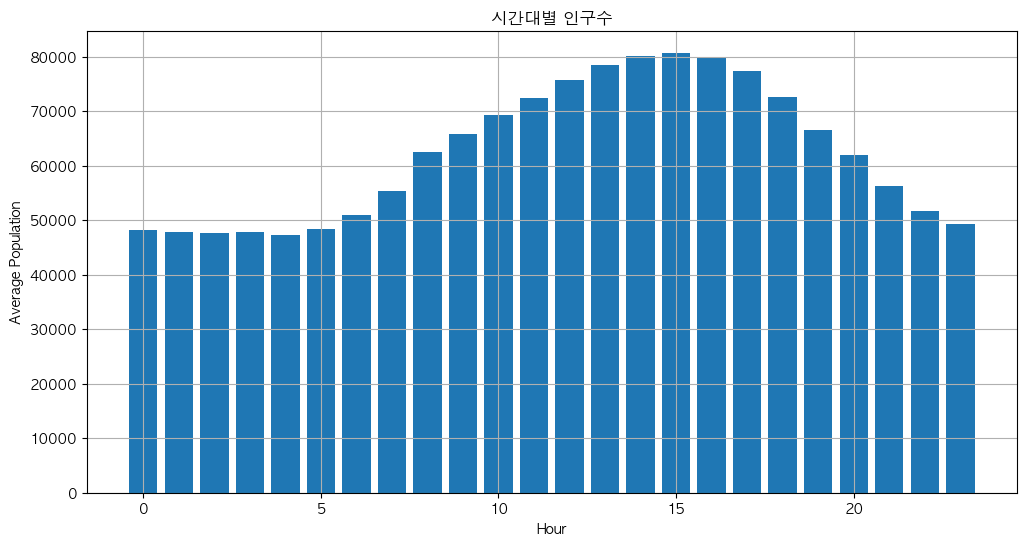

In [60]:
import matplotlib.pyplot as plt

# 날짜별 총생활인구수 변화 시각화
daily_population = songpa_station.groupby('날짜')['총생활인구수'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_population.index, daily_population.values)
plt.title("날짜별 인구수")
plt.xlabel("Date")
plt.ylabel("Total Population")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 시간대별 평균 생활인구수 시각화
hourly_population = songpa_station.groupby('시간대')['총생활인구수'].mean()

plt.figure(figsize=(12, 6))
plt.bar(hourly_population.index, hourly_population.values)
plt.title("시간대별 인구수")
plt.xlabel("Hour")
plt.ylabel("Average Population")
plt.grid()
plt.show()

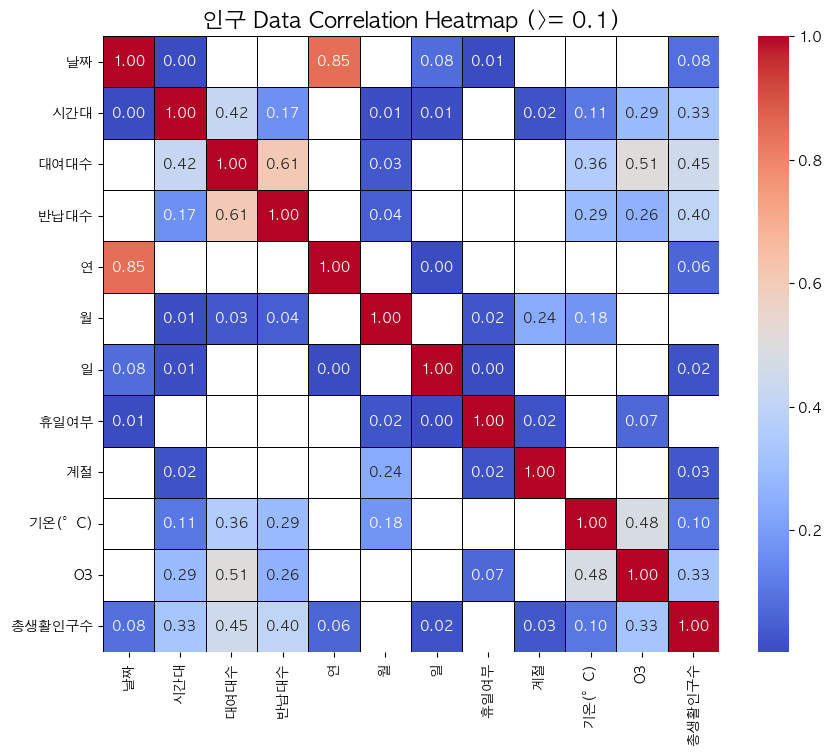

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 상관계수 계산 및 필터링
correlation_matrix = songpa_station.replace(
    {'평일': 0, '휴일': 1, '봄': 0, '여름': 1, '가을': 2, '겨울': 3}
).drop(columns='대여소').corr()
filtered_correlation = correlation_matrix.where(correlation_matrix >= 0.0, np.nan)

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_correlation,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True,
    mask=filtered_correlation.isnull(),
    linewidths=0.5,  # 박스 경계선 강조
    linecolor='black',  # 경계선 색상 설정
    square=True  # 정사각형 박스
)
plt.title('인구 Data Correlation Heatmap (>= 0.1)', fontsize=16)
plt.show()

> 총 생활 인구수는 대여대수, 반납대수와 약상관을 지니는 것을 알 수 있다.

In [62]:
# 시간대별 인구수
hourly_analysis = songpa_station.groupby('시간대')['총생활인구수'].mean()
print(hourly_analysis)

시간대
0     48179.647835
1     47876.376362
2     47597.636327
3     47849.496353
4     47338.872891
5     48470.125525
6     50922.988504
7     55333.089929
8     62471.133818
9     65910.198133
10    69284.535749
11    72505.601032
12    75759.133416
13    78524.707632
14    80190.477200
15    80763.628047
16    79742.828960
17    77447.342098
18    72650.915920
19    66499.294121
20    61912.010085
21    56302.933516
22    51736.721260
23    49323.146361
Name: 총생활인구수, dtype: float64


---

## 지하철 데이터 사용
- [서울시 지하철호선별 역별 시간대별 승하차 인원 정보](https://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do)
- 지하철 데이터를 이용하여 송파구청의 유동인구를 파악해 상관관계를 분석해보겠다.

In [63]:
import pandas as pd
from datetime import datetime, timedelta
import chardet

# 결과를 저장할 리스트
filtered_data_list = []

# 시작 연월과 종료 연월 설정
start_date = datetime(2023, 5, 1)  # 202305
end_date = datetime(2024, 5, 1)    # 202405

# 시작부터 종료까지 한 달 단위로 반복
current_date = start_date
while current_date <= end_date:
    # 연월(YYYYMM) 형식으로 파일명 생성
    year_month = current_date.strftime("%Y%m")
    file_path = f"../../data/subway/지하철 정보_{year_month}.csv"
    
    try:
        # 파일 읽기 시 여러 인코딩 시도
        try:
            olympic_subway = pd.read_csv(file_path, index_col=False, encoding='utf-8')
        except UnicodeDecodeError:
            olympic_subway = pd.read_csv(file_path, index_col=False, encoding='cp949')
        
        # 조건 필터링
        filtered_data = olympic_subway[
            (olympic_subway['지하철역'] == '잠실(송파구청)')
        ]
        
        # 결과 저장
        filtered_data_list.append(filtered_data)
    except FileNotFoundError:
        # 파일이 없을 경우 예외 처리
        print(f"File not found: {file_path}")
    except Exception as e:
        # 기타 에러 처리
        print(f"Error processing file {file_path}: {e}")
    
    # 한 달 추가
    next_month = current_date.month % 12 + 1
    next_year = current_date.year + (current_date.month // 12)
    current_date = datetime(next_year, next_month, 1)

# 필터링된 모든 데이터를 하나의 DataFrame으로 합치기
songpa_subway_count = pd.concat(filtered_data_list, ignore_index=True)

In [64]:
# 데이터 확인
songpa_subway_count.head()

사용월  호선명      지하철역  04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  \
0  202305  2호선  잠실(송파구청)           103            14         13957   
1  202305  8호선  잠실(송파구청)             5             0          1404   
2  202306  2호선  잠실(송파구청)            80             4         13744   
3  202306  8호선  잠실(송파구청)             5             0          1600   
4  202307  2호선  잠실(송파구청)            45             3         13173   

   05시-06시 하차인원  06시-07시 승차인원  06시-07시 하차인원  07시-08시 승차인원  ...  23시-24시 하차인원  \
0          5114         50654         38537        120887  ...         48110   
1          2845          4573         11770          8945  ...          4138   
2          5092         50565         36618        121327  ...         47873   
3          2763          4669         11510          9101  ...          4013   
4          5065         50309         33732        120593  ...         46560   

   00시-01시 승차인원  00시-01시 하차인원  01시-02시 승차인원  01시-02시 하차인원  02시-03시 승차인원  \
0          4757         11181             8           348             0   
1          1435          1683             0            55             0   
2          5011         10934             5           185             0   
3          1656          1526             0            67             0   
4          4477          9038             1           168             0   

   02시-03시 하차인원  03시-04시 승차인원  03시-04시 하차인원      작업일자  
0             2             0             0  20230603  
1             0             0             0  20230603  
2             0             0             0  20230703  
3             0             0             0  20230703  
4             0             0             0  20230803  

[5 rows x 52 columns]

In [65]:
songpa_subway_count.columns

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원', '작업일자'],
      dtype='object')

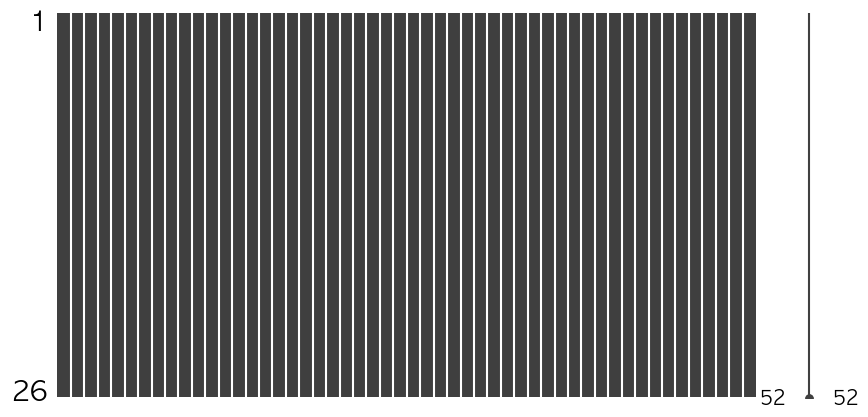

In [66]:
msno.matrix(songpa_subway_count, figsize=(10,5))
plt.show()

#### 유동인구 구하기
- 지하철 데이터는 월별이므로 일별, 시간대별로 나눠줘야 학습이 가능하다.
- 데이터가 월별이라 구분 기준점이 필요함. 
- 서울시 인구 데이터를 기반으로 지하철 데이터를 구분해보겠다.

In [67]:
import pandas as pd

# 1. 보조 데이터 준비: 시간대별 유동인구 계산
def preprocess_subway_data(subway_data):
    # 시간대별 유동인구 데이터 생성
    processed_data = []
    
    # 데이터프레임 열명 추출
    time_columns = [col for col in subway_data.columns if '승차인원' in col or '하차인원' in col]
    time_slots = sorted(set(col.split()[0] for col in time_columns))  # 시간대 추출

    for time_slot in time_slots:
        승차_col = f"{time_slot} 승차인원"
        하차_col = f"{time_slot} 하차인원"
        
        if 승차_col in subway_data.columns and 하차_col in subway_data.columns:
            subway_data[f"{time_slot} 유동인구"] = subway_data[승차_col] + subway_data[하차_col]
            
            for idx, row in subway_data.iterrows():
                processed_data.append({
                    '연': row['사용월'] // 100,
                    '월': row['사용월'] % 100,
                    '시간대': int(time_slot.split('시')[0]), 
                    '유동인구': row[f"{time_slot} 유동인구"]
                })
    
    return pd.DataFrame(processed_data)

# 보조 데이터 처리
processed_subway = preprocess_subway_data(songpa_subway_count)

# 2. `songpa_station`에서 생활인구 비율 계산
# 날짜 기준으로 총생활인구수 비율 계산
songpa_station['생활인구_비율'] = (
    songpa_station['총생활인구수'] /
    songpa_station.groupby(['연', '월', '일'])['총생활인구수'].transform('sum')
)

# 3. 보조 데이터 병합
# `연`, `월`, `시간대`를 기준으로 병합
songpa_station = pd.merge(
    songpa_station,
    processed_subway,
    on=['연', '월', '시간대'],
    how='left'
)

# 4. 유동인구 가중치 적용
# 유동인구 * 생활인구 비율
songpa_station['가중치_유동인구'] = (
    songpa_station['유동인구'] * songpa_station['생활인구_비율']
)

# 결과 확인
songpa_station

대여소         날짜  시간대  대여대수  반납대수     연  월   일 휴일여부  계절  기온(°C)      O3  \
0      송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄    12.1  0.0153   
1      송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄    12.1  0.0153   
2      송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄    11.6  0.0488   
3      송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄    11.6  0.0488   
4      송파구청 2023-05-01    2   3.0   0.0  2023  5   1   평일   봄    11.0  0.0438   
...     ...        ...  ...   ...   ...   ... ..  ..  ...  ..     ...     ...   
16689  송파구청 2024-05-31   22   8.0   7.0  2024  5  31   평일   봄    18.8  0.0507   
16690  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄    18.4  0.0487   
16691  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄    18.4  0.0487   
16692  송파구청 2024-06-01    0   0.0   1.0  2024  6   1   휴일  여름     NaN     NaN   
16693  송파구청 2024-06-01    5   0.0   1.0  2024  6   1   휴일  여름     NaN     NaN   

           총생활인구수   생활인구_비율     유동인구     가중치_유동인구  
0      47058.7030  0.034655  15938.0   552.335261  
1      47058.7030  0.034655   3118.0   108.055047  
2      46312.8268  0.034106    356.0    12.141722  
3      46312.8268  0.034106     55.0     1.875828  
4      46316.7649  0.034109      2.0     0.068218  
...           ...       ...      ...          ...  
16689  53048.9262  0.038635  36639.0  1415.542868  
16690  49750.3319  0.036233  86589.0  3137.339542  
16691  49750.3319  0.036233  14958.0   541.966357  
16692         NaN       NaN      NaN          NaN  
16693         NaN       NaN      NaN          NaN  

[16694 rows x 16 columns]

---
## Target(대여대수, 반납대수)과 Feature의 상관관계 시각화

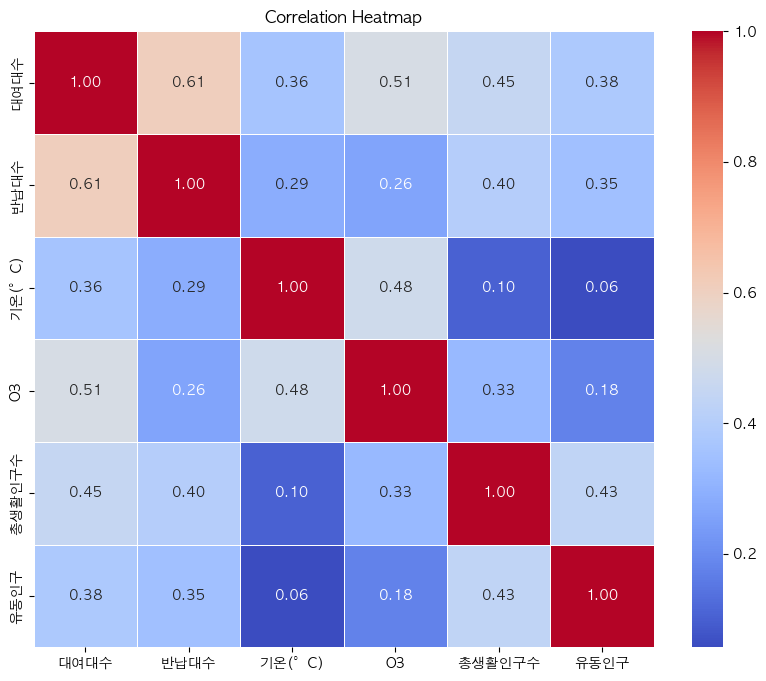

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 대여대수와 반납대수 관련 데이터 추출
columns_of_interest = ['대여대수', '반납대수', '기온(°C)', 'O3', '총생활인구수','유동인구']
correlation_data = songpa_station[columns_of_interest]

# 2. 상관관계 계산
correlation_matrix = correlation_data.corr()

# 3. 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # 상관계수 표시
    cmap='coolwarm',  # 색상 맵
    fmt=".2f",  # 소수점 두 자리로 표시
    linewidths=0.5  # 셀 간격
)
plt.title('Correlation Heatmap')
plt.show()

> 지하철에서 추출한 유동인구 컬럼의 약상관을 보이는것을 파악할 수 있다.

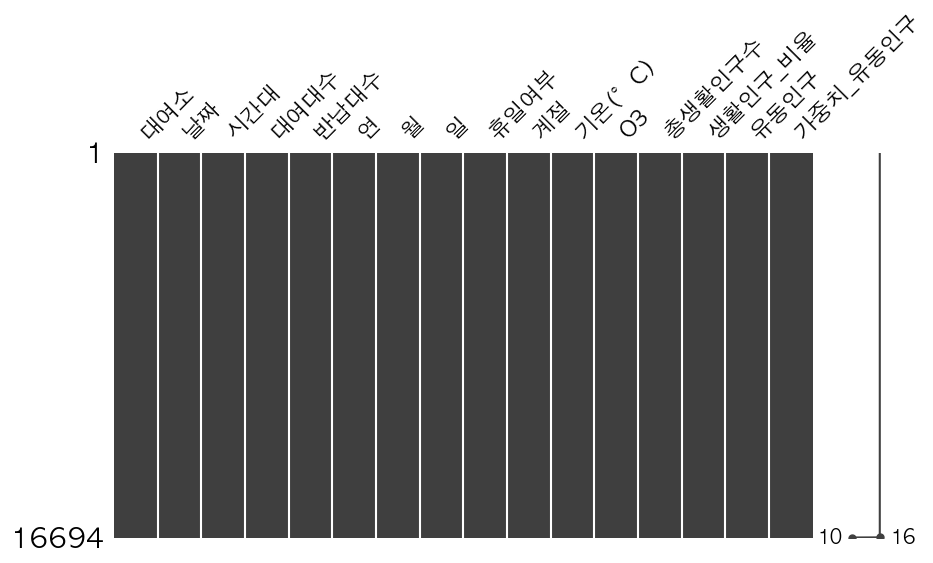

In [69]:
# 데이터 결측치 최종확인
msno.matrix(songpa_station, figsize=(10,5))
plt.show()

### 이상치 제거 
- songpa_station 데이터 결측치 제거

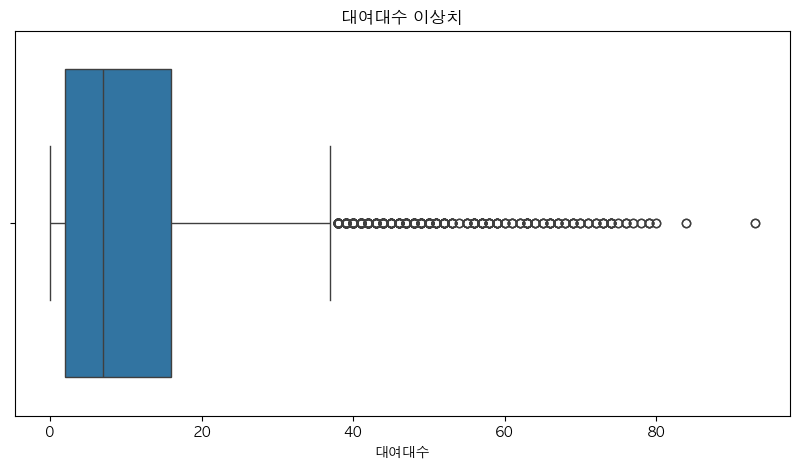

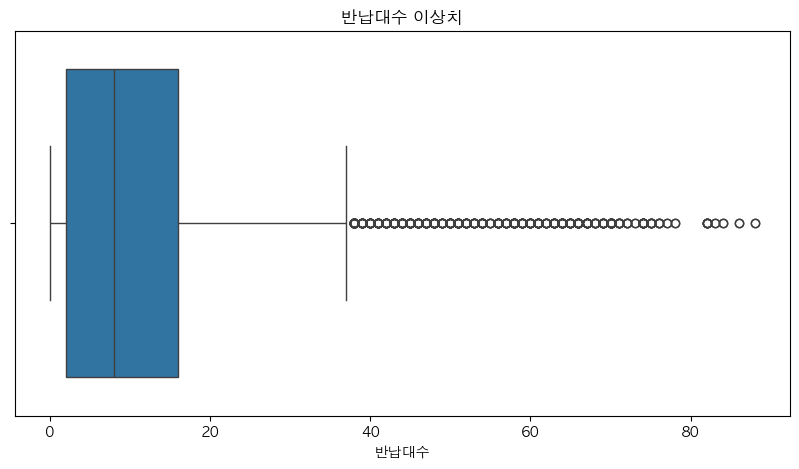

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# 대여대수와 반납대수 이상치 확인
plt.figure(figsize=(10, 5))
sns.boxplot(data=songpa_station, x='대여대수')
plt.title('대여대수 이상치')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=songpa_station, x='반납대수')
plt.title('반납대수 이상치')
plt.show()

In [71]:
# 80이 넘는 대수는 이상치로 간주하여 제거
songpa_station = songpa_station[
    (songpa_station['대여대수'] < 80) & 
    (songpa_station['반납대수'] < 80)
]

# 결과 확인
songpa_station

대여소         날짜  시간대  대여대수  반납대수     연  월   일 휴일여부  계절  기온(°C)      O3  \
0      송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄    12.1  0.0153   
1      송파구청 2023-05-01    0   3.0   1.0  2023  5   1   평일   봄    12.1  0.0153   
2      송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄    11.6  0.0488   
3      송파구청 2023-05-01    1  10.0   1.0  2023  5   1   평일   봄    11.6  0.0488   
4      송파구청 2023-05-01    2   3.0   0.0  2023  5   1   평일   봄    11.0  0.0438   
...     ...        ...  ...   ...   ...   ... ..  ..  ...  ..     ...     ...   
16689  송파구청 2024-05-31   22   8.0   7.0  2024  5  31   평일   봄    18.8  0.0507   
16690  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄    18.4  0.0487   
16691  송파구청 2024-05-31   23   4.0   4.0  2024  5  31   평일   봄    18.4  0.0487   
16692  송파구청 2024-06-01    0   0.0   1.0  2024  6   1   휴일  여름     NaN     NaN   
16693  송파구청 2024-06-01    5   0.0   1.0  2024  6   1   휴일  여름     NaN     NaN   

           총생활인구수   생활인구_비율     유동인구     가중치_유동인구  
0      47058.7030  0.034655  15938.0   552.335261  
1      47058.7030  0.034655   3118.0   108.055047  
2      46312.8268  0.034106    356.0    12.141722  
3      46312.8268  0.034106     55.0     1.875828  
4      46316.7649  0.034109      2.0     0.068218  
...           ...       ...      ...          ...  
16689  53048.9262  0.038635  36639.0  1415.542868  
16690  49750.3319  0.036233  86589.0  3137.339542  
16691  49750.3319  0.036233  14958.0   541.966357  
16692         NaN       NaN      NaN          NaN  
16693         NaN       NaN      NaN          NaN  

[16674 rows x 16 columns]

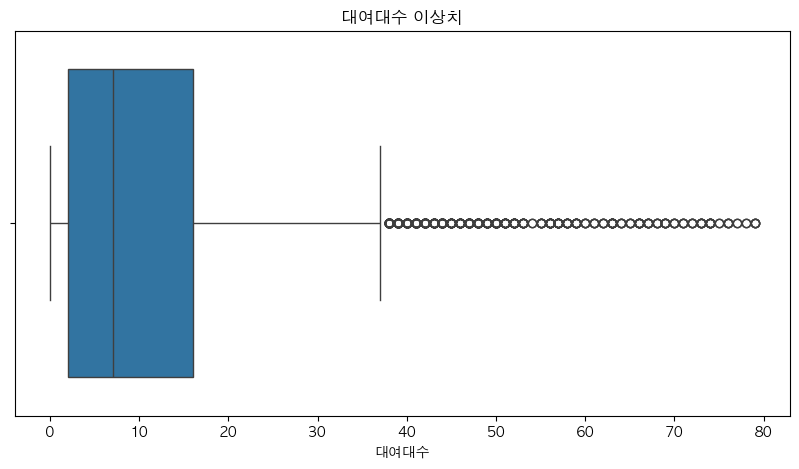

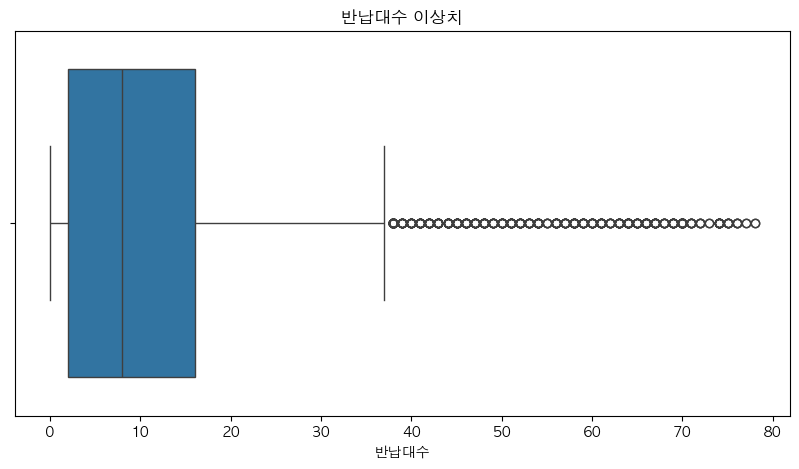

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# 대여대수와 반납대수 이상치 확인
plt.figure(figsize=(10, 5))
sns.boxplot(data=songpa_station, x='대여대수')
plt.title('대여대수 이상치')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=songpa_station, x='반납대수')
plt.title('반납대수 이상치')
plt.show()

#### 박스플롯에서 보이는 이상치의 의미

박스플롯에서 상자 밖에 있는 점들은 IQR(사분위수 범위) 기준으로 이상치로 간주됨.         

하지만 반드시 잘못된 값은 아님.     

예를 들어, 이벤트 날이나 특정 상황에서 대여/반납 대수가 갑자기 많아질 수도 있음.        
데이터 자체가 올바른 값이라면, 제거하지않고 사용하는게 적합. => 분석에 중요한 패턴이 될 수 있음.        
제거한다면, 특정 패턴에서 학습이 불가함.        

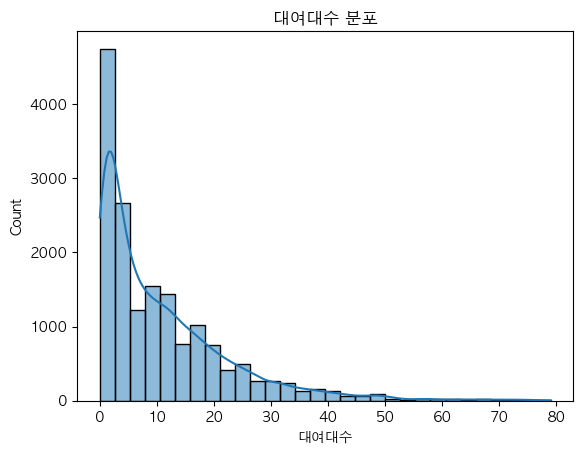

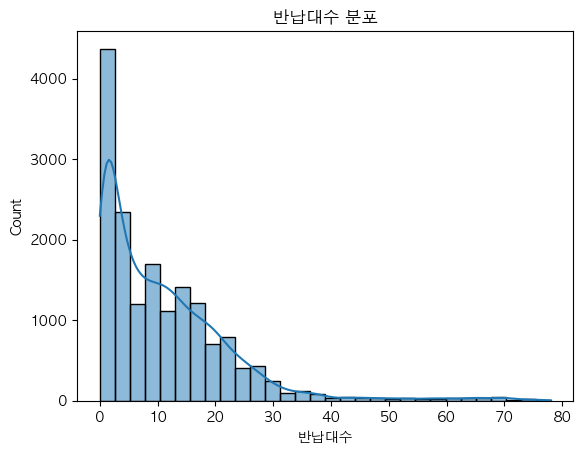

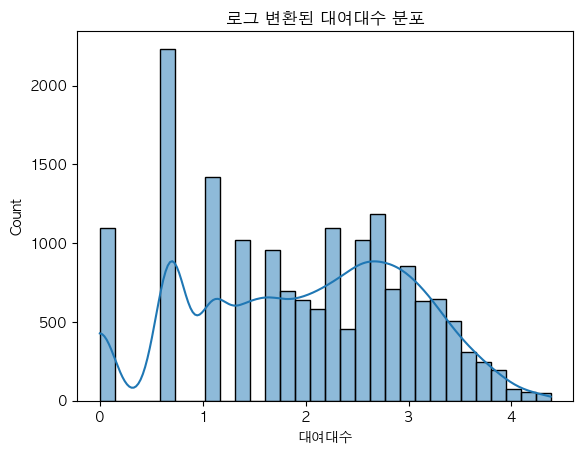

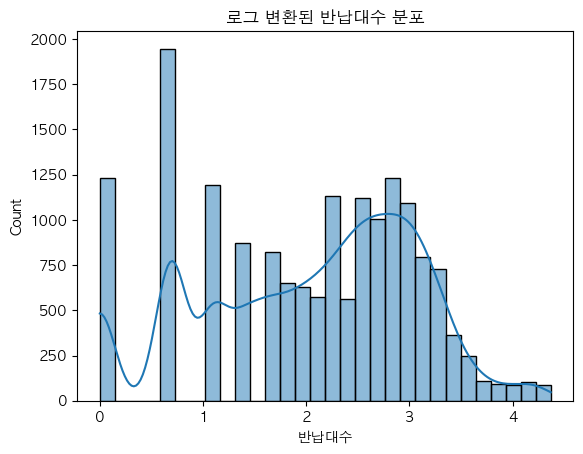

In [73]:
# 데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(songpa_station['대여대수'], bins=30, kde=True)
plt.title('대여대수 분포')
plt.show()
sns.histplot(songpa_station['반납대수'], bins=30, kde=True)
plt.title('반납대수 분포')
plt.show()

sns.histplot(np.log1p(songpa_station['대여대수']), bins=30, kde=True)
plt.title('로그 변환된 대여대수 분포')
plt.show()
sns.histplot(np.log1p(songpa_station['반납대수']), bins=30, kde=True)
plt.title('로그 변환된 반납대수 분포')
plt.show()

#### 이상치 변환
- 이상치를 제거하지 않는 대신, 연속형 데이터의 특성을 유지, 이상치 영향을 줄이기 위해 로그 변환 적용
- 로그 변환은 데이터의 큰 값을 축소하여 데이터 분포를 더 정규분포에 가깝게 만듦

##### 결과
- 로그 변환 전에는 데이터가 치우친 분포를 보임, 변환 후에는 정규분포에 가까워짐.
- 이상치의 영향을 줄이고, 분석과 예측의 신뢰성 높임.

---

## Modeling

    Targets:
        - 대여대수 : 특정 날짜와 시간대에서 대여된 따릉이 수.
        - 반납대수 : 특정 날짜와 시간대에서 반납된 따릉이 수.

    Features:
        시간 관련 변수:
            - 날짜 : 데이터의 날짜
            - 시간대 : 하루중 몇 시인지
            - 휴일여부 : 휴일 또는 평일 여부
            - 계절 : 계절 정보

    환경 변수:
        - 기온 : 해당 시간대의 기온.
        - O3 : 대기 중 오존 농도.
        
    인구 데이터:
        - 총생활인구수 : 해당시간대에 지역 내 총생활인구.
        - 생활인구_비율 : 총생활인구 대비 해당 시간대의 인구 비율.
        - 유동인구 : 지하철 데이터와 결합된 유동인구.

#### Library

In [74]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

#### 데이터 전처리(One-Hot Encoding)

In [75]:
# 데이터 준비
data = songpa_station.copy()

# One-Hot Encoding
data = pd.get_dummies(data, columns=['휴일여부', '계절'], drop_first=False)

# 데이터 크기 확인
print(f"Data Shape: {data.shape}")

Data Shape: (16674, 20)


#### feature & target

In [76]:
# 피처와 타겟 정의
features = [
    '연', '월', '일', '시간대', '기온(°C)', 'O3', '총생활인구수', '생활인구_비율','유동인구', '가중치_유동인구',
    '휴일여부_평일', '휴일여부_휴일', '계절_봄', '계절_여름', '계절_가을', '계절_겨울'
]
targets = ['대여대수', '반납대수']

X = data[features]
y = data[targets]

# 결측값이 포함된 행 제거
X = X.dropna()
y = y.loc[X.index]  # X와 y의 인덱스 동기화

#### 정규화

In [77]:
# 정규화 (MinMaxScaler)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

#### Model

In [78]:
# 모델 정의
models = {
    "Random Forest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "XGBoost": MultiOutputRegressor(XGBRegressor(random_state=42)),
    "AdaBoost": MultiOutputRegressor(AdaBoostRegressor(random_state=42)),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
}

# 하이퍼파라미터 그리드 설정
param_grids = {
    "Random Forest": {
        "estimator__n_estimators": [50, 100],
        "estimator__max_depth": [10, 20, None]
    },
    "XGBoost": {
        "estimator__learning_rate": [0.01, 0.1],
        "estimator__max_depth": [3, 5, 7]
    },
    "AdaBoost": {
        "estimator__n_estimators": [50, 100],
        "estimator__learning_rate": [0.01, 0.1, 1.0]
    },
    "GradientBoosting": {
        "estimator__n_estimators": [50, 100],
        "estimator__max_depth": [3, 5],
        "estimator__learning_rate": [0.01, 0.1]
    }
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

#### 평가 

In [82]:
# 평가 함수
def evaluate_model(model, X, y, kf):
    train_rmse_list = []
    test_rmse_list = []
    train_r2_list = []
    test_r2_list = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # 모델 학습
        model.fit(X_train, y_train)

        # 훈련 데이터 예측
        y_train_pred = model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)

        # 테스트 데이터 예측
        y_test_pred = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        # 결과 저장
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)

    # 평균 점수 반환
    return (
        np.mean(train_rmse_list), np.mean(test_rmse_list),
        np.mean(train_r2_list), np.mean(test_r2_list)
    )

# 최적화된 모델 저장
optimized_models = {}

# GridSearch 실행
for model_name, model in models.items():
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(
            model, param_grid, cv=kf, scoring="r2", n_jobs=-1
        )
        try:
            grid_search.fit(X_scaled, y_scaled)
            optimized_models[model_name] = grid_search.best_estimator_
            print(f"Best Params for {model_name}: {grid_search.best_params_}")
        except Exception as e:
            print(f"Error optimizing {model_name}: {e}")
    else:
        # 하이퍼파라미터 그리드가 없는 모델은 건너뜀
        print(f"Skipping optimization for {model_name}, no param grid provided.")
        optimized_models[model_name] = model

Best Params for Random Forest: {'estimator__max_depth': None, 'estimator__n_estimators': 100}
Best Params for XGBoost: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 7}
Best Params for AdaBoost: {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 100}
Best Params for GradientBoosting: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 100}


In [83]:
# 최적화된 모델 학습 및 평가
for model_name, model in optimized_models.items():
    print(f"Training {model_name}...")
    train_rmse, test_rmse, train_r2, test_r2 = evaluate_model(model, X_scaled, y_scaled, kf)
    print(f"{model_name} Results:")
    print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"Train R²: {train_r2:.2f}, Test R²: {test_r2:.2f}")
    print("=" * 50)

Training Random Forest...
Random Forest Results:
Train RMSE: 0.02, Test RMSE: 0.05
Train R²: 0.98, Test R²: 0.89
Training XGBoost...
XGBoost Results:
Train RMSE: 0.04, Test RMSE: 0.06
Train R²: 0.93, Test R²: 0.85
Training AdaBoost...
AdaBoost Results:
Train RMSE: 0.09, Test RMSE: 0.09
Train R²: 0.63, Test R²: 0.63
Training GradientBoosting...
GradientBoosting Results:
Train RMSE: 0.06, Test RMSE: 0.06
Train R²: 0.85, Test R²: 0.81


---
## 최종 확인

### 모델 별 주요 피쳐 확인

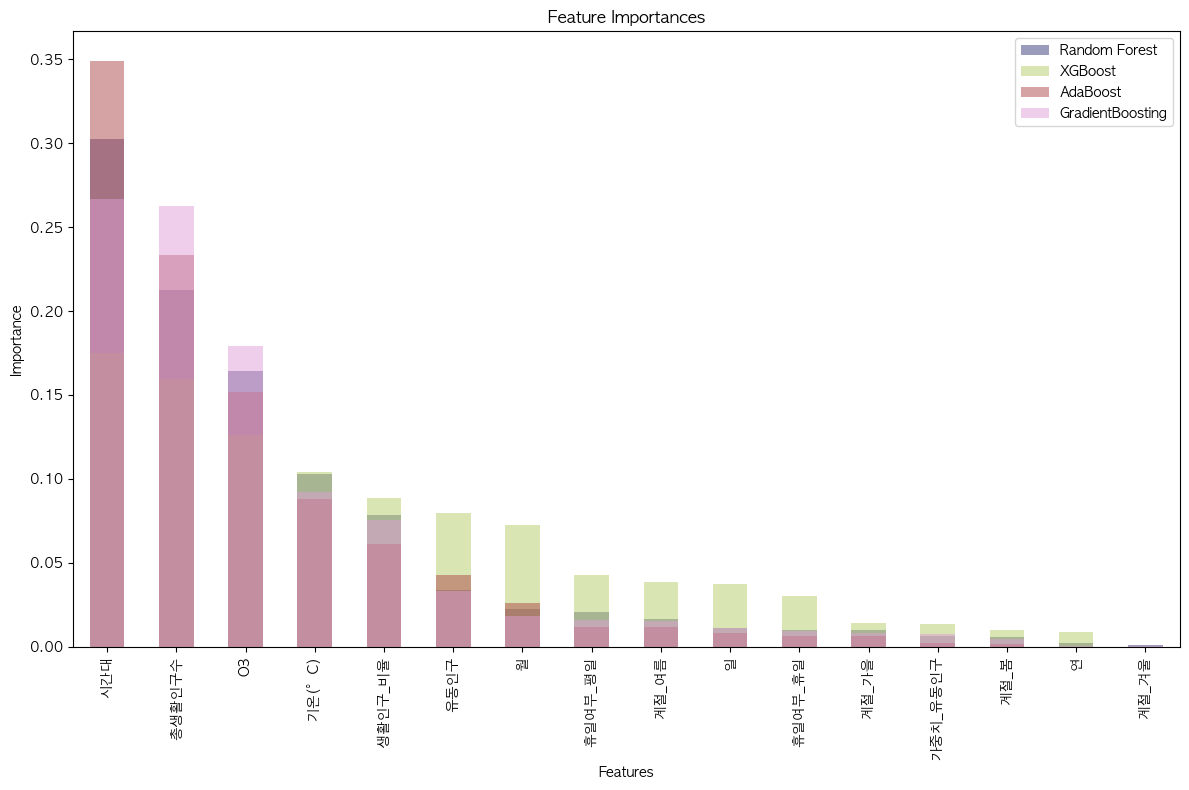

In [84]:
# 모든 모델의 주요 특성 비교
model_importances = {}

for model_name, model in optimized_models.items():
    if hasattr(model, 'estimators_'):
        model_importances[model_name] = pd.Series(
            model.estimators_[0].feature_importances_,
            index=X.columns
        )
# 색상 설정
colors = plt.cm.tab20b(np.linspace(0, 1, len(model_importances)))

plt.figure(figsize=(12, 8))
for color, (model_name, importances) in zip(colors, model_importances.items()):
    importances.sort_values(ascending=False).plot(kind="bar", alpha=0.5, color=color,label=model_name)

plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.legend()
plt.tight_layout()
plt.show()

### 잔차 그래프

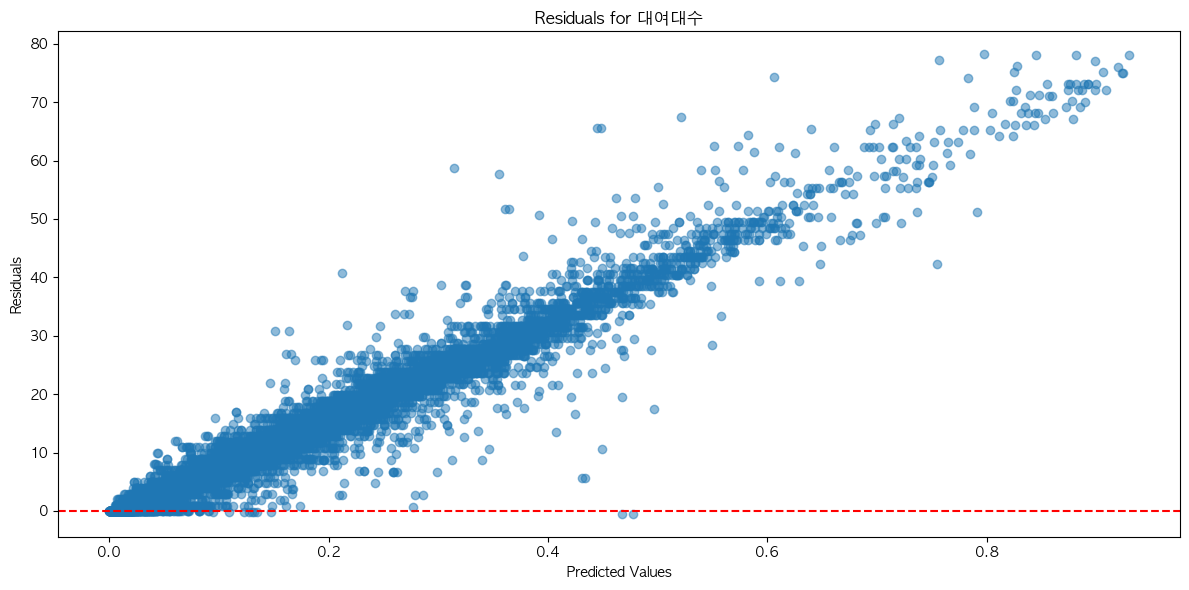

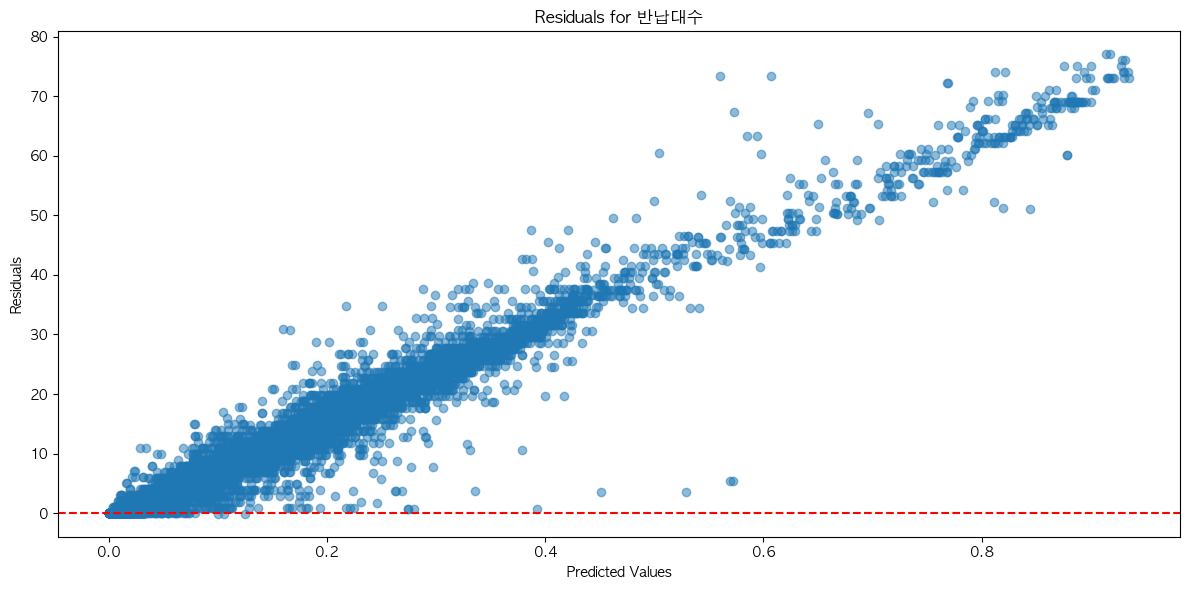

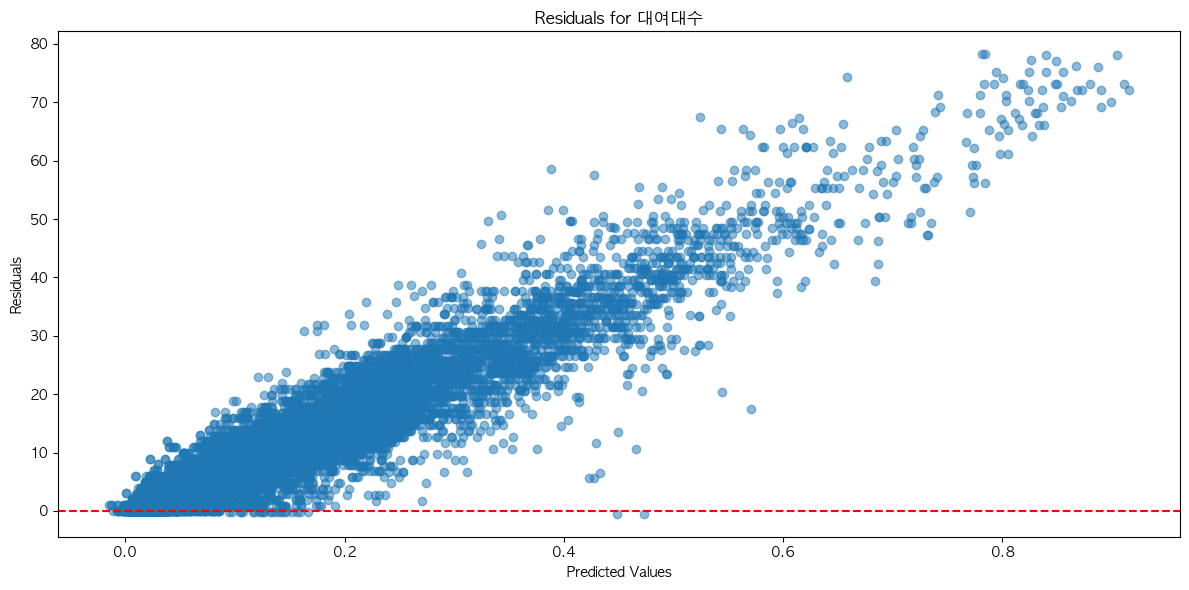

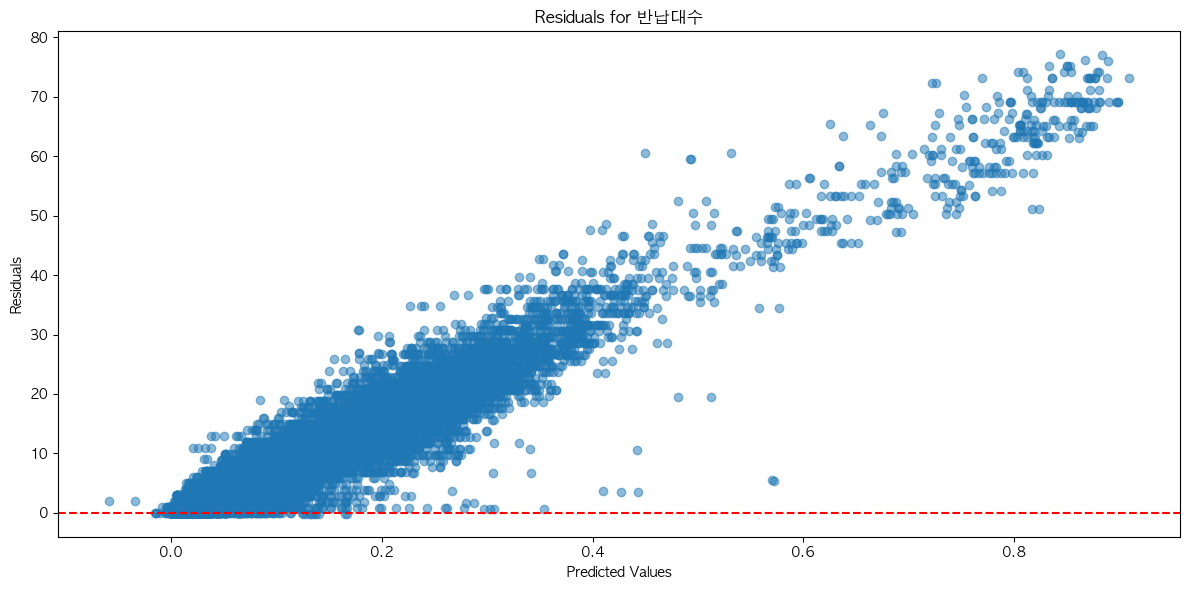

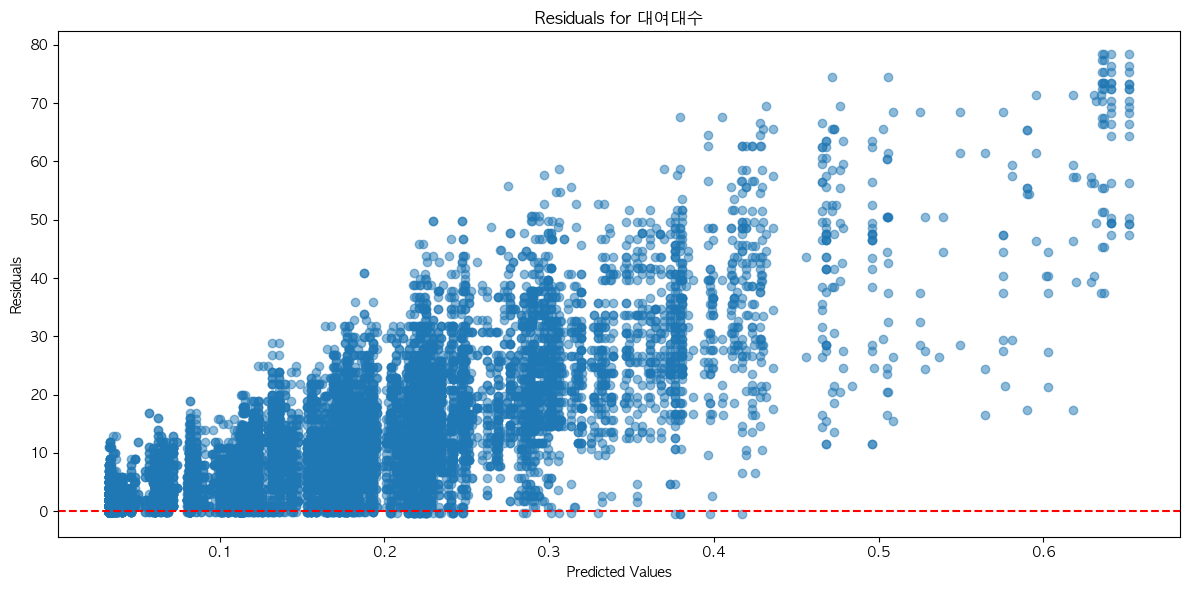

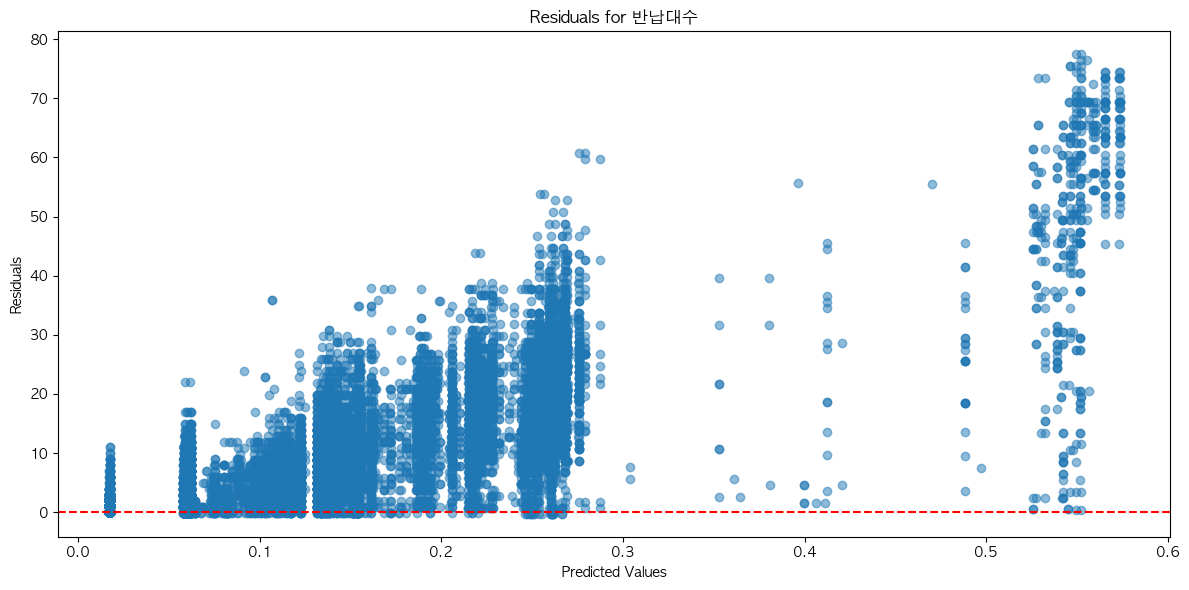

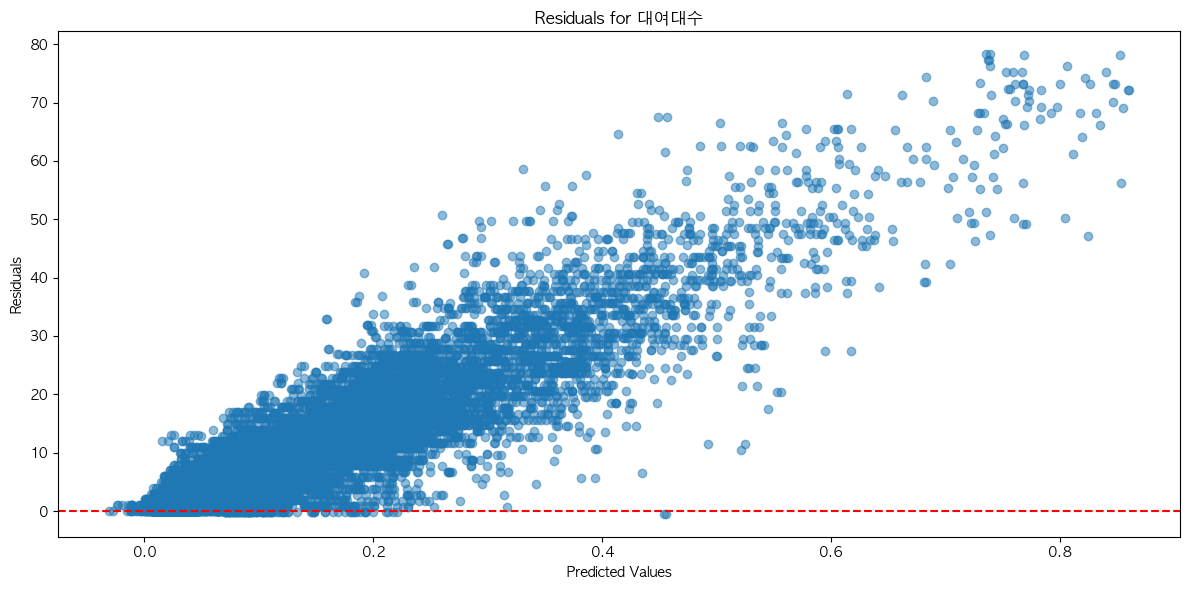

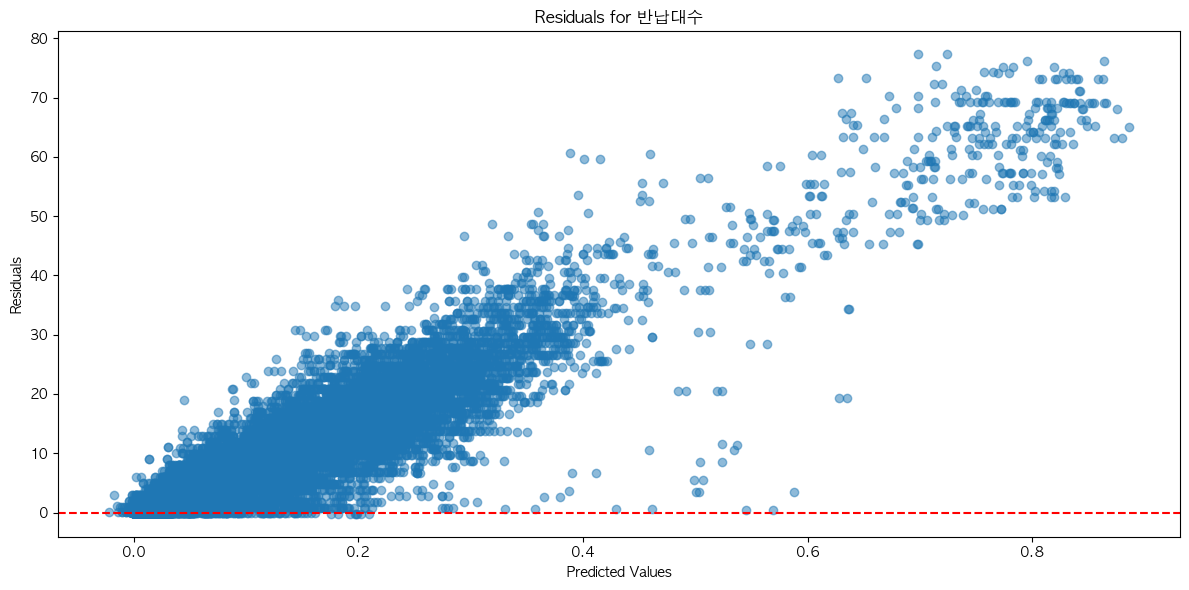

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# 잔차를 시각화하는 함수 수정
def plot_residuals(model, X, y_true, target_names):
    y_pred = model.predict(X)
    
    for i, target_name in enumerate(target_names):
        residuals = y_true.iloc[:, i] - y_pred[:, i]  # 각 타겟별 잔차 계산
        
        # 잔차 분포 시각화
        plt.figure(figsize=(12, 6))
        plt.scatter(y_pred[:, i], residuals, alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Residuals for {target_name}")
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.tight_layout()
        plt.show()

# 함수 호출
targets = ['대여대수', '반납대수']  # 다중 타겟 이름
plot_residuals(optimized_models["Random Forest"], X_scaled, y, targets)
plot_residuals(optimized_models["XGBoost"], X_scaled, y, targets)
plot_residuals(optimized_models["AdaBoost"], X_scaled, y, targets)
plot_residuals(optimized_models["GradientBoosting"], X_scaled, y, targets)

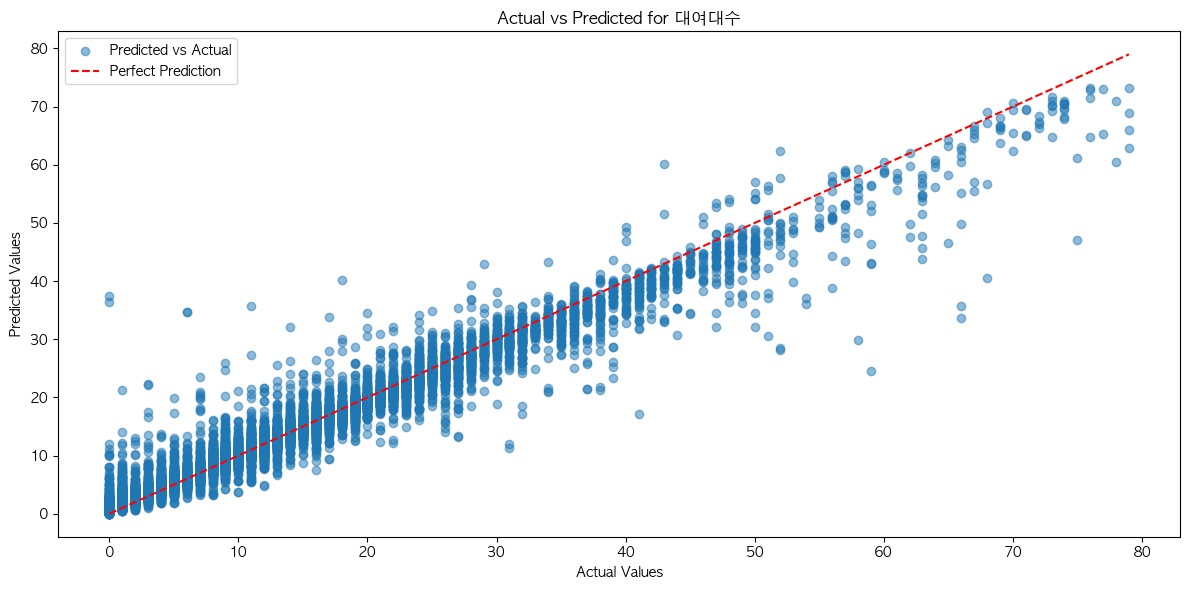

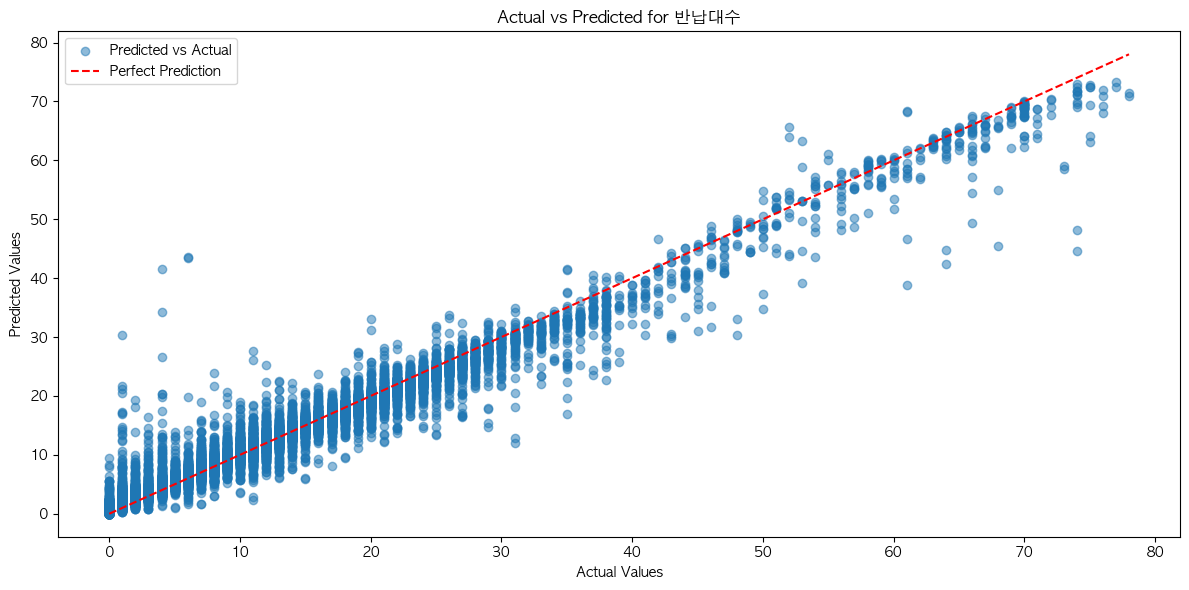

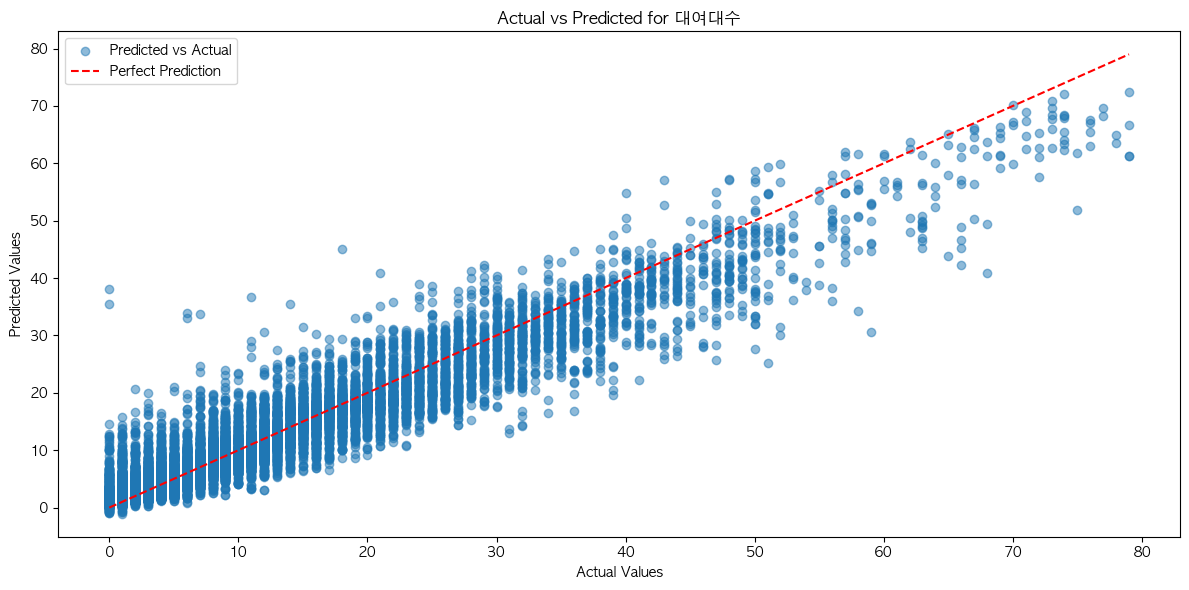

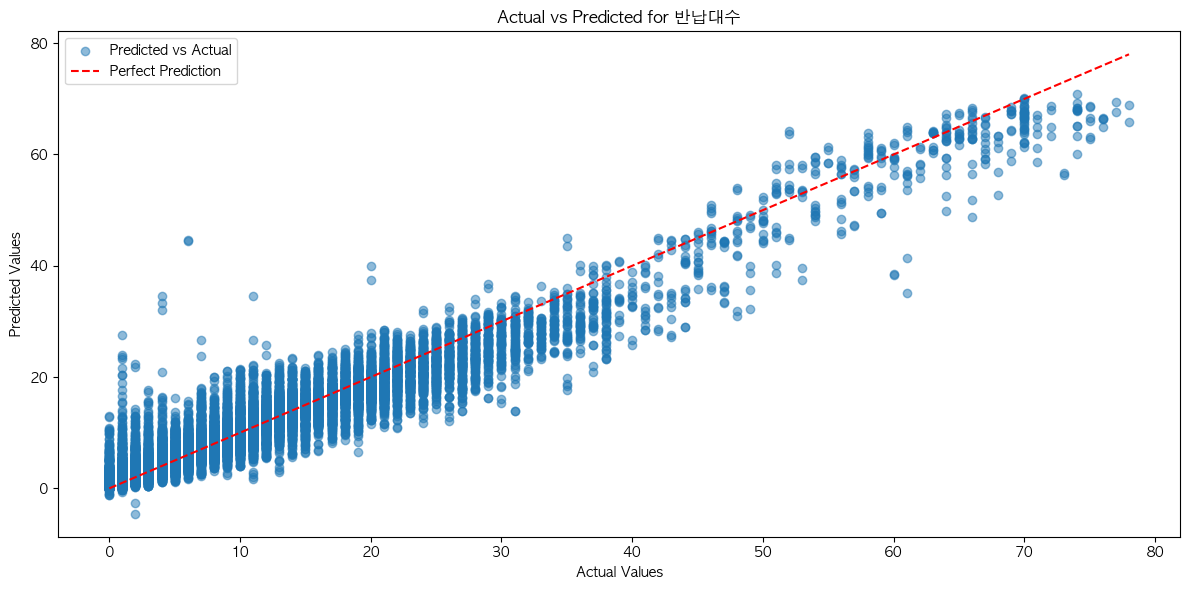

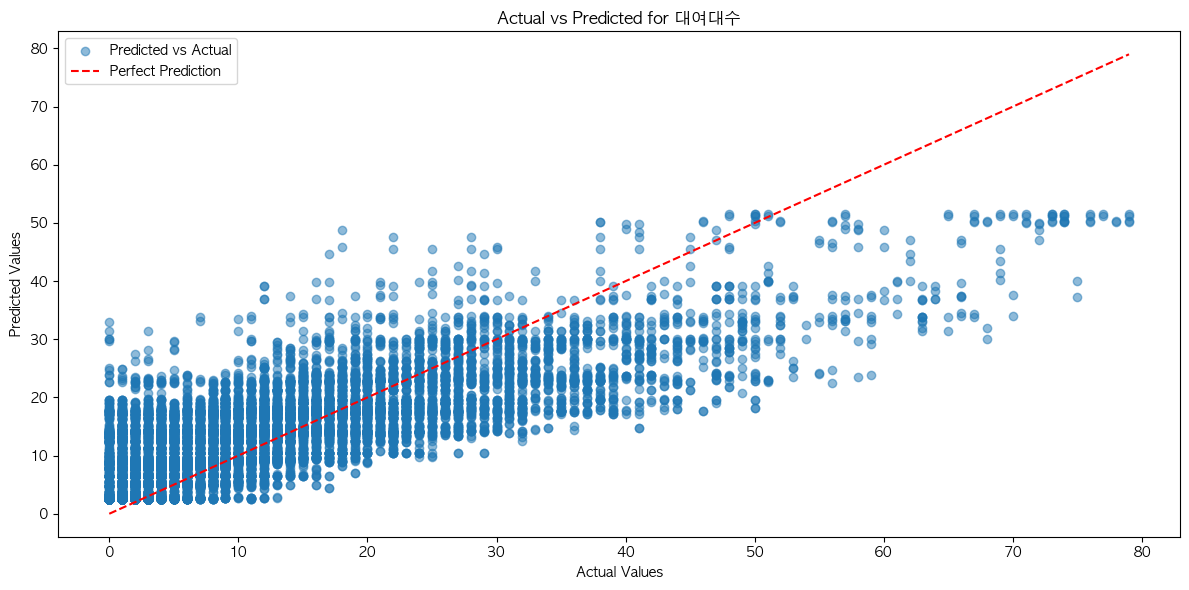

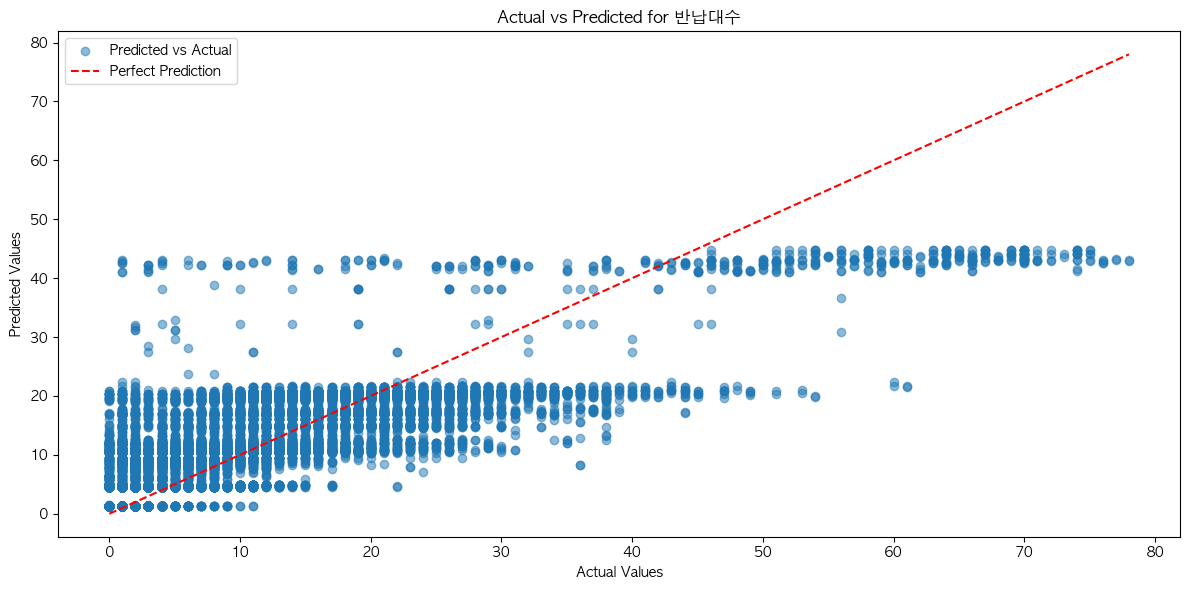

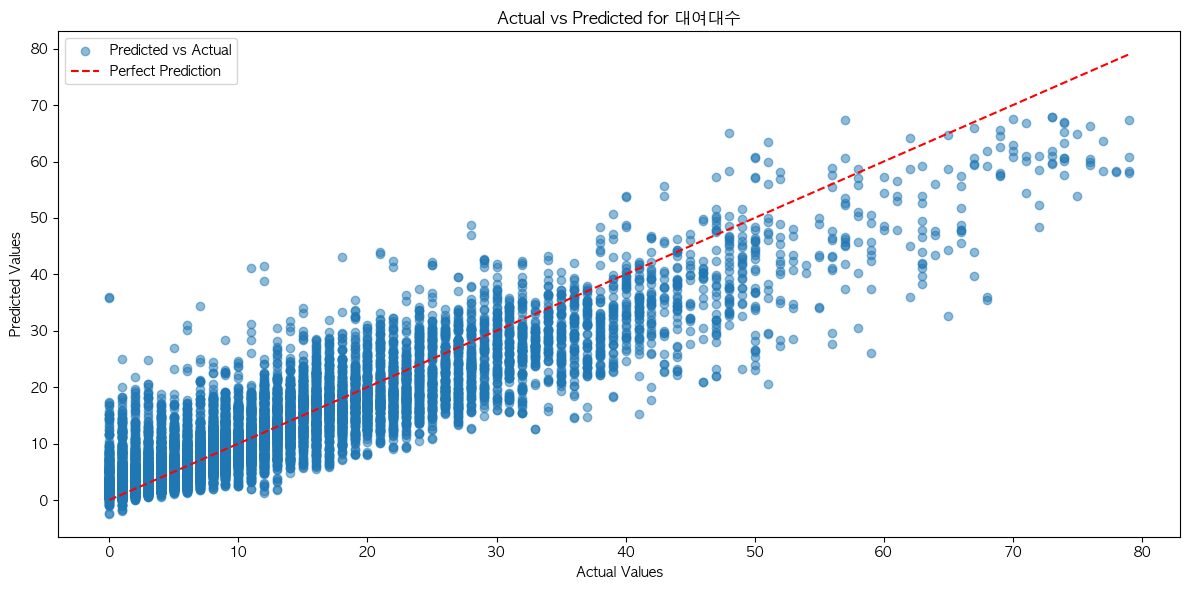

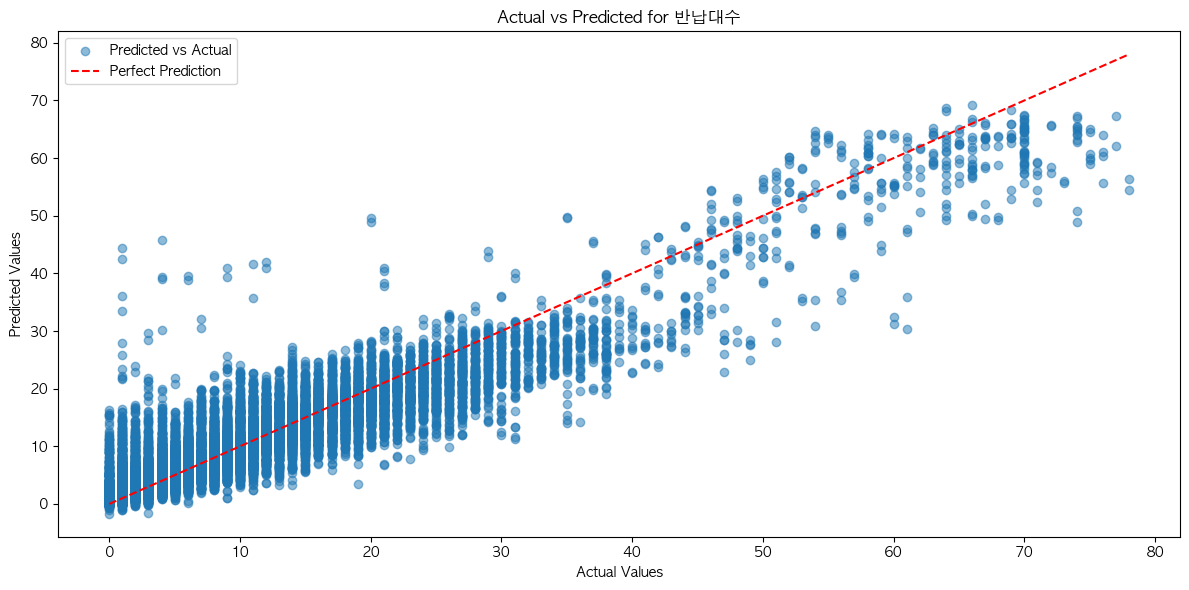

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 실제값과 예측값 비교 시각화 함수
def plot_actual_vs_predicted(model, X, y_true, target_names):
    y_pred = model.predict(X)
    
    for i, target_name in enumerate(target_names):
        # 실제값과 예측값 비교
        plt.figure(figsize=(12, 6))
        plt.scatter(y_true.iloc[:, i], y_pred[:, i], alpha=0.5, label="Predicted vs Actual")
        plt.plot([y_true.iloc[:, i].min(), y_true.iloc[:, i].max()], 
                 [y_true.iloc[:, i].min(), y_true.iloc[:, i].max()], 
                 color='red', linestyle='--', label="Perfect Prediction")
        plt.title(f"Actual vs Predicted for {target_name}")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.legend()
        plt.tight_layout()
        plt.show()

# 함수 호출
targets = ['대여대수', '반납대수']
plot_actual_vs_predicted(optimized_models["Random Forest"], X_scaled, y, targets)
plot_actual_vs_predicted(optimized_models["XGBoost"], X_scaled, y, targets)
plot_actual_vs_predicted(optimized_models["AdaBoost"], X_scaled, y, targets)
plot_actual_vs_predicted(optimized_models["GradientBoosting"], X_scaled, y, targets)

> 위 근거들을 기반하여 최종 모델 Random Forest 선정

---
## 모델 저장

In [89]:
print(optimized_models["Random Forest"].predict(X_scaled))

[[0.03822785 0.01794872]
 [0.03924051 0.02012821]
 [0.10670886 0.01538462]
 ...
 [0.15848101 0.11512821]
 [0.05620253 0.04961538]
 [0.05696203 0.04576923]]


In [90]:
from joblib import dump

# 스케일러, 모델 저장
dump({"scaler": scaler, "model": optimized_models["Random Forest"]}, "../../data/songpa_office_model.h5")

['../../data/songpa_office_model.h5']

> 모델 연동시 scaler dict 형태로 받아줘서 사용